In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("pokemon.csv")

In [3]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [5]:
# df.groupby('type1').mean()

In [6]:

df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [7]:
# zamiana miejsc po to zeby kolumna name buyla pierwsza kolumna
first_column = df.pop('name')


In [8]:
df.insert(0, 'name', first_column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

In [9]:
# replikuję każdy wiersz (każdy pokemon występuje teraz dwa razy)

df_type= pd.DataFrame(np.repeat(df.values, 2, axis=0))


In [10]:

# przydzielam ponownie nazwy kolumn
    
df_type.columns = df.columns


In [11]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1602 non-null   object
 1   abilities          1602 non-null   object
 2   against_bug        1602 non-null   object
 3   against_dark       1602 non-null   object
 4   against_dragon     1602 non-null   object
 5   against_electric   1602 non-null   object
 6   against_fairy      1602 non-null   object
 7   against_fight      1602 non-null   object
 8   against_fire       1602 non-null   object
 9   against_flying     1602 non-null   object
 10  against_ghost      1602 non-null   object
 11  against_grass      1602 non-null   object
 12  against_ground     1602 non-null   object
 13  against_ice        1602 non-null   object
 14  against_normal     1602 non-null   object
 15  against_poison     1602 non-null   object
 16  against_psychic    1602 non-null   object


In [12]:
# kilka pokemonów ma ten sam typ w type1 i type2, naprawiam to zastępując type2 NaNem
df_type.type2 = np.where(df_type.type2 == df_type.type1, np.nan, df_type.type2) 

In [13]:
# w co drugim indeksie zastępuję wartość z type 1 na type2
df_type.type1 = np.where(df_type.index % 2 == 0, df_type.type2, df_type.type1)

In [14]:
# pozbywam się zduplikowanych pokemonów, które nie miały drugiego typu (a więc teraz mają NaN w pierwszym typie)

df_type = df_type[df_type['type1'].notna()]


In [15]:
# tworzę nowy df bez kolumny type2, która już nie jest potrzebna
df_type = df_type.drop(columns=['type2'], axis=1)


In [16]:
df_type["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)
df_type['capture_rate'] =df_type['capture_rate'].astype('int')
df_type['capture_rate'].dtype

dtype('int32')

In [17]:
# Removing 3 columns out of our dataset
df_type.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True) 
# adding total abilities that a pokemon has
df_type["tot_abilities"] = df_type.apply(lambda x: len(x["abilities"].split(',')), axis=1)

In [18]:
df2_type = df_type.drop(columns= ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water','base_egg_steps', 'base_happiness', 'classfication'], axis=1)
df2_type

name                    abilities attack base_total  capture_rate   
0     Bulbasaur  ['Overgrow', 'Chlorophyll']     49        318            45  \
1     Bulbasaur  ['Overgrow', 'Chlorophyll']     49        318            45   
2       Ivysaur  ['Overgrow', 'Chlorophyll']     62        405            45   
3       Ivysaur  ['Overgrow', 'Chlorophyll']     62        405            45   
4      Venusaur  ['Overgrow', 'Chlorophyll']    100        625            45   
...         ...                          ...    ...        ...           ...   
1596   Guzzlord              ['Beast Boost']    101        570            15   
1597   Guzzlord              ['Beast Boost']    101        570            15   
1599   Necrozma              ['Prism Armor']    107        600             3   
1600   Magearna               ['Soul-Heart']     95        600             3   
1601   Magearna               ['Soul-Heart']     95        600             3   

     defense experience_growth height_m   hp sp_attack sp_defense speed   
0         49           1059860      0.7   45        65         65    45  \
1         49           1059860      0.7   45        65         65    45   
2         63           1059860      1.0   60        80         80    60   
3         63           1059860      1.0   60        80         80    60   
4        123           1059860      2.0   80       122        120    80   
...      ...               ...      ...  ...       ...        ...   ...   
1596      53           1250000      5.5  223        97         53    43   
1597      53           1250000      5.5  223        97         53    43   
1599     101           1250000      2.4   97       127         89    79   
1600     115           1250000      1.0   80       130        115    65   
1601     115           1250000      1.0   80       130        115    65   

        type1 weight_kg generation is_legendary  tot_abilities  
0      poison       6.9          1            0              2  
1       grass       6.9          1            0              2  
2      poison      13.0          1            0              2  
3       grass      13.0          1            0              2  
4      poison     100.0          1            0              2  
...       ...       ...        ...          ...            ...  
1596   dragon     888.0          7            1              1  
1597     dark     888.0          7            1              1  
1599  psychic     230.0          7            1              1  
1600    fairy      80.5          7            1              1  
1601    steel      80.5          7            1              1  

[1211 rows x 17 columns]

### Normalizacja df

In [19]:
df2_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 0 to 1601
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1211 non-null   object
 1   abilities          1211 non-null   object
 2   attack             1211 non-null   object
 3   base_total         1211 non-null   object
 4   capture_rate       1211 non-null   int32 
 5   defense            1211 non-null   object
 6   experience_growth  1211 non-null   object
 7   height_m           1177 non-null   object
 8   hp                 1211 non-null   object
 9   sp_attack          1211 non-null   object
 10  sp_defense         1211 non-null   object
 11  speed              1211 non-null   object
 12  type1              1211 non-null   object
 13  weight_kg          1177 non-null   object
 14  generation         1211 non-null   object
 15  is_legendary       1211 non-null   object
 16  tot_abilities      1211 non-null   int64 
dtype

In [20]:
df_to_norm_type = df2_type
df_to_norm_type = df_to_norm_type.drop(columns= ['capture_rate','abilities', 'experience_growth', 'generation', 'tot_abilities','weight_kg', 'height_m' ], axis=1)
df_to_norm_type

name attack base_total defense   hp sp_attack sp_defense speed   
0     Bulbasaur     49        318      49   45        65         65    45  \
1     Bulbasaur     49        318      49   45        65         65    45   
2       Ivysaur     62        405      63   60        80         80    60   
3       Ivysaur     62        405      63   60        80         80    60   
4      Venusaur    100        625     123   80       122        120    80   
...         ...    ...        ...     ...  ...       ...        ...   ...   
1596   Guzzlord    101        570      53  223        97         53    43   
1597   Guzzlord    101        570      53  223        97         53    43   
1599   Necrozma    107        600     101   97       127         89    79   
1600   Magearna     95        600     115   80       130        115    65   
1601   Magearna     95        600     115   80       130        115    65   

        type1 is_legendary  
0      poison            0  
1       grass            0  
2      poison            0  
3       grass            0  
4      poison            0  
...       ...          ...  
1596   dragon            1  
1597     dark            1  
1599  psychic            1  
1600    fairy            1  
1601    steel            1  

[1211 rows x 10 columns]

In [21]:
df3_type = df2_type
df3_type = df3_type.drop(columns= ['abilities', 'experience_growth', 'generation', 'tot_abilities'], axis=1)


In [22]:
df2_type.head()

name                    abilities attack base_total  capture_rate   
0  Bulbasaur  ['Overgrow', 'Chlorophyll']     49        318            45  \
1  Bulbasaur  ['Overgrow', 'Chlorophyll']     49        318            45   
2    Ivysaur  ['Overgrow', 'Chlorophyll']     62        405            45   
3    Ivysaur  ['Overgrow', 'Chlorophyll']     62        405            45   
4   Venusaur  ['Overgrow', 'Chlorophyll']    100        625            45   

  defense experience_growth height_m  hp sp_attack sp_defense speed   type1   
0      49           1059860      0.7  45        65         65    45  poison  \
1      49           1059860      0.7  45        65         65    45   grass   
2      63           1059860      1.0  60        80         80    60  poison   
3      63           1059860      1.0  60        80         80    60   grass   
4     123           1059860      2.0  80       122        120    80  poison   

  weight_kg generation is_legendary  tot_abilities  
0       6.9          1            0              2  
1       6.9          1            0              2  
2      13.0          1            0              2  
3      13.0          1            0              2  
4     100.0          1            0              2

In [23]:
df3_type.head()

name attack base_total  capture_rate defense height_m  hp sp_attack   
0  Bulbasaur     49        318            45      49      0.7  45        65  \
1  Bulbasaur     49        318            45      49      0.7  45        65   
2    Ivysaur     62        405            45      63      1.0  60        80   
3    Ivysaur     62        405            45      63      1.0  60        80   
4   Venusaur    100        625            45     123      2.0  80       122   

  sp_defense speed   type1 weight_kg is_legendary  
0         65    45  poison       6.9            0  
1         65    45   grass       6.9            0  
2         80    60  poison      13.0            0  
3         80    60   grass      13.0            0  
4        120    80  poison     100.0            0

In [24]:
df3_type[["attack", 'base_total',"defense"]] =df3_type[["attack", 'base_total',"defense"]].astype(str).astype(int)

In [25]:
df3_type[["sp_attack", "sp_defense", 'speed', 'hp']] = df3_type[["sp_attack", "sp_defense", 'speed', 'hp']].astype(str).astype(int)

In [26]:
df3_type[[ 'weight_kg', 'height_m']]=df3_type[['weight_kg', 'height_m']].astype(str).astype(float)

In [27]:
df3_type.groupby('type1')[['attack','sp_attack','defense','sp_defense','hp','speed','weight_kg']].median()

attack  sp_attack  defense  sp_defense    hp  speed  weight_kg
type1                                                                   
bug         65.0       50.0     60.0        56.0  60.0   57.0      14.50
dark        90.0       66.5     67.0        63.0  67.5   71.0      36.00
dragon     100.0       91.0     90.0        87.5  75.5   75.5      83.50
electric    65.0       81.0     60.0        75.0  65.0   86.0      20.75
fairy       55.0       80.0     67.0        80.0  67.0   60.0       7.80
fighting   100.0       60.0     75.0        65.0  75.0   65.0      49.80
fire        78.0       85.0     61.5        66.0  65.0   75.0      30.00
flying      75.0       70.0     62.5        65.0  70.0   80.0      24.35
ghost       75.0       85.0     76.0        82.0  59.0   55.0      20.80
grass       70.0       65.0     70.0        70.0  65.0   52.0      15.65
ground      85.0       52.5     80.0        65.0  75.0   50.5      63.40
ice         72.5       70.0     76.0        70.0  72.0   62.5      56.65
normal      71.0       55.0     60.0        60.0  70.0   70.0      24.40
poison      64.5       63.0     62.0        65.0  60.0   60.0      15.00
psychic     65.0       90.0     71.0        85.0  69.0   71.0      29.55
rock        89.0       55.0    100.0        65.0  67.0   48.0      59.00
steel       90.0       60.0    106.5        85.5  65.0   60.0      75.25
water       70.0       66.0     70.0        65.0  68.0   63.0      28.00

Text(0.5, 1.0, 'All Stats')

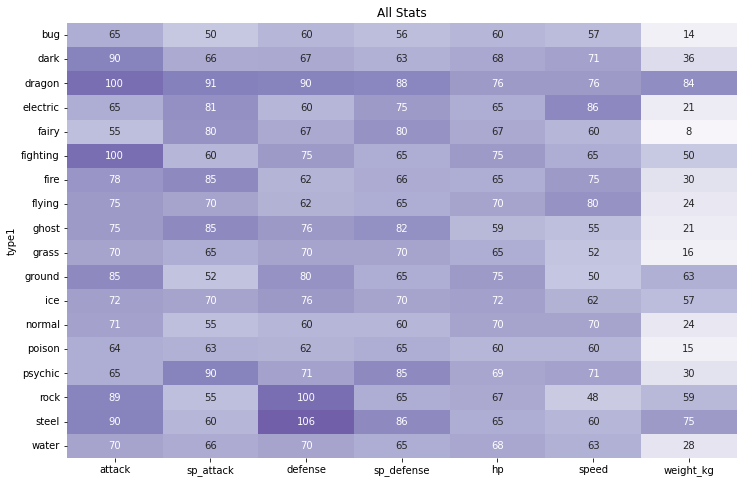

In [28]:
plt.figure(figsize=(12,8))

sns.heatmap(df3_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','weight_kg']].median()
            ,annot=True,cbar=False,cmap='Purples',fmt='.0f',vmin=0,vmax=150).set_title('All Stats')

<Figure size 864x576 with 0 Axes>

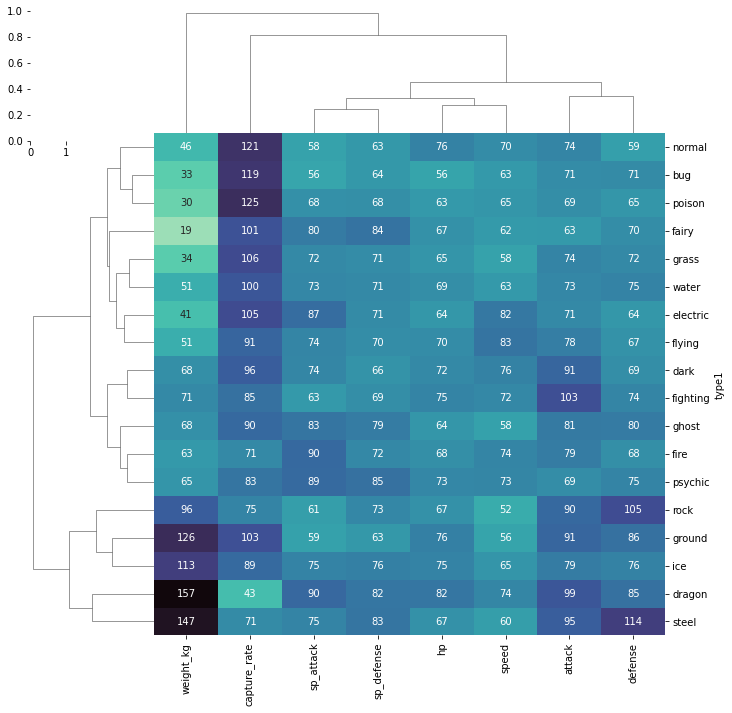

In [29]:
plt.figure(figsize=(12,8))

sns.clustermap(df3_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','weight_kg', 'capture_rate']].mean()
            ,annot=True,cbar=False,cmap="mako_r",fmt='.0f',vmin=0,vmax=160)
plt.show();

<Figure size 864x576 with 0 Axes>

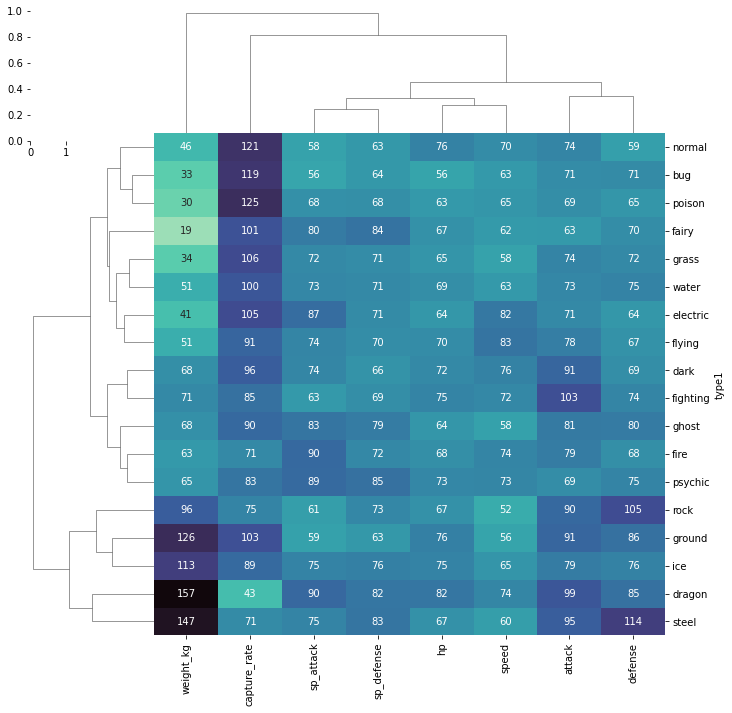

In [30]:
plt.figure(figsize=(12,8))

sns.clustermap(df3_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','weight_kg', 'capture_rate']].mean()
            ,annot=True,cbar=False,cmap="mako_r",fmt='.0f',vmin=0,vmax=160)
plt.show();

<Figure size 864x576 with 0 Axes>

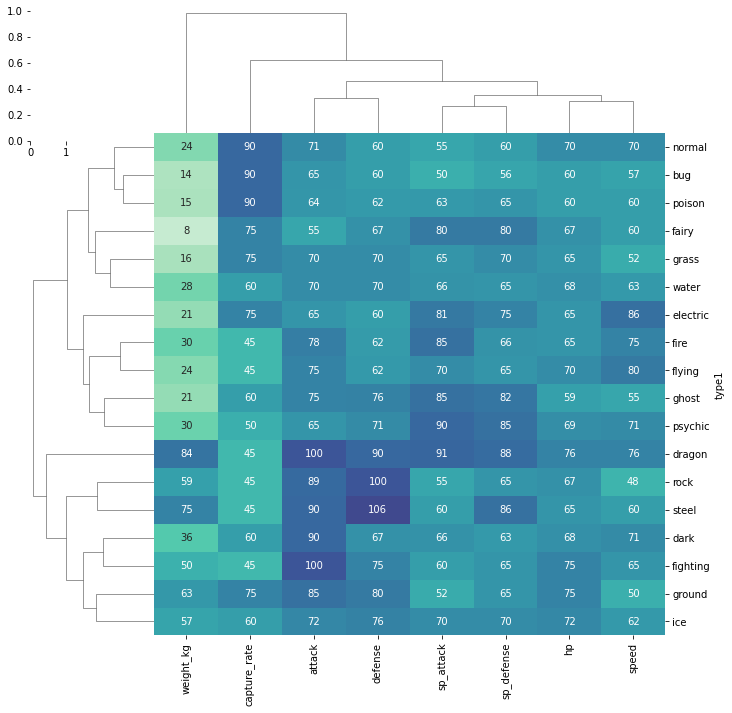

In [31]:
plt.figure(figsize=(12,8))

sns.clustermap(df3_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','weight_kg', 'capture_rate']].median()
            ,annot=True,cbar=False,cmap="mako_r",fmt='.0f',vmin=0,vmax=160)
plt.show();

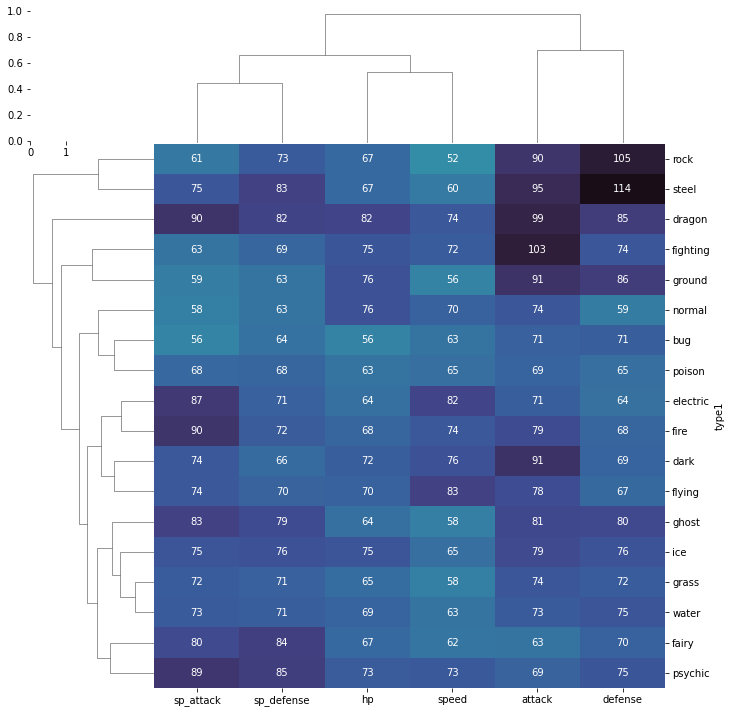

In [32]:
#plt.figure(figsize=(12,8))

sns.clustermap(df3_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed']].mean()
            ,annot=True,cbar=False,cmap="mako_r",fmt='.0f',vmin=0,vmax=120)
plt.show()

In [33]:
df_to_norm_type [["attack", 'base_total',"defense", "sp_attack", "sp_defense", 'speed', 'hp', 'is_legendary']] = df_to_norm_type[["attack", 'base_total',"defense", "sp_attack", "sp_defense", 'speed', 'hp', 'is_legendary']].astype(str).astype(int)

In [34]:
df_to_norm_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 0 to 1601
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1211 non-null   object
 1   attack        1211 non-null   int32 
 2   base_total    1211 non-null   int32 
 3   defense       1211 non-null   int32 
 4   hp            1211 non-null   int32 
 5   sp_attack     1211 non-null   int32 
 6   sp_defense    1211 non-null   int32 
 7   speed         1211 non-null   int32 
 8   type1         1211 non-null   object
 9   is_legendary  1211 non-null   int32 
dtypes: int32(8), object(2)
memory usage: 66.2+ KB


Text(0.5, 1.0, 'All Stats')

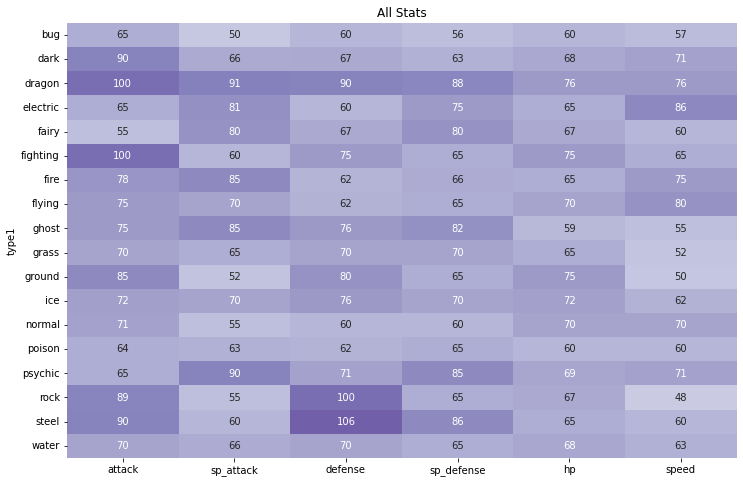

In [35]:
plt.figure(figsize=(12,8))

sns.heatmap(df_to_norm_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed']].median()
            ,annot=True,cbar=False,cmap='Purples',fmt='.0f',vmin=0,vmax=150).set_title('All Stats')

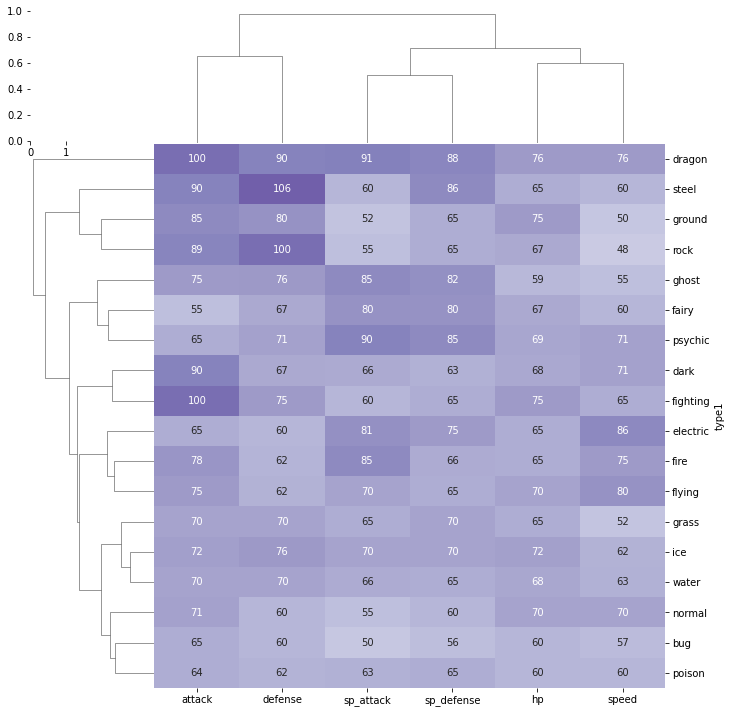

In [36]:
#plt.figure(figsize=(12,8))

sns.clustermap(df_to_norm_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed']].median()
            ,annot=True,cbar=False,cmap='Purples',fmt='.0f',vmin=0,vmax=150);

In [37]:
df_to_norm_type = df_to_norm_type.set_index(['name','type1', 'is_legendary'])



## NORMALIZACJA OSOBNO NON LEG< OSOBNO LEGENDARY

In [38]:

df_to_norm_type

attack  base_total  defense   hp  sp_attack   
name      type1   is_legendary                                                
Bulbasaur poison  0                 49         318       49   45         65  \
          grass   0                 49         318       49   45         65   
Ivysaur   poison  0                 62         405       63   60         80   
          grass   0                 62         405       63   60         80   
Venusaur  poison  0                100         625      123   80        122   
...                                ...         ...      ...  ...        ...   
Guzzlord  dragon  1                101         570       53  223         97   
          dark    1                101         570       53  223         97   
Necrozma  psychic 1                107         600      101   97        127   
Magearna  fairy   1                 95         600      115   80        130   
          steel   1                 95         600      115   80        130   

                                sp_defense  speed  
name      type1   is_legendary                     
Bulbasaur poison  0                     65     45  
          grass   0                     65     45  
Ivysaur   poison  0                     80     60  
          grass   0                     80     60  
Venusaur  poison  0                    120     80  
...                                    ...    ...  
Guzzlord  dragon  1                     53     43  
          dark    1                     53     43  
Necrozma  psychic 1                     89     79  
Magearna  fairy   1                    115     65  
          steel   1                    115     65  

[1211 rows x 7 columns]

In [39]:
non_legendary_to_norm_type = df_to_norm_type.xs(0, level="is_legendary")
legendary_to_norm_type = df_to_norm_type.xs(1, level="is_legendary")

In [40]:
non_legendary_to_norm_type

attack  base_total  defense  hp  sp_attack  sp_defense   
name      type1                                                              
Bulbasaur poison        49         318       49  45         65          65  \
          grass         49         318       49  45         65          65   
Ivysaur   poison        62         405       63  60         80          80   
          grass         62         405       63  60         80          80   
Venusaur  poison       100         625      123  80        122         120   
...                    ...         ...      ...  ..        ...         ...   
Jangmo-o  dragon        55         300       65  45         45          45   
Hakamo-o  fighting      75         420       90  55         65          70   
          dragon        75         420       90  55         65          70   
Kommo-o   fighting     110         600      125  75        100         105   
          dragon       110         600      125  75        100         105   

                    speed  
name      type1            
Bulbasaur poison       45  
          grass        45  
Ivysaur   poison       60  
          grass        60  
Venusaur  poison       80  
...                   ...  
Jangmo-o  dragon       45  
Hakamo-o  fighting     65  
          dragon       65  
Kommo-o   fighting     85  
          dragon       85  

[1097 rows x 7 columns]

In [41]:
normalized_non_legendary=round(((non_legendary_to_norm_type-non_legendary_to_norm_type.min())/(non_legendary_to_norm_type.max()-non_legendary_to_norm_type.min())*100),0)

In [42]:
normalized_non_legendary

attack  base_total  defense    hp  sp_attack  sp_defense   
name      type1                                                                
Bulbasaur poison      24.0        27.0     20.0  17.0       33.0        21.0  \
          grass       24.0        27.0     20.0  17.0       33.0        21.0   
Ivysaur   poison      32.0        43.0     26.0  23.0       42.0        29.0   
          grass       32.0        43.0     26.0  23.0       42.0        29.0   
Venusaur  poison      53.0        86.0     52.0  31.0       68.0        48.0   
...                    ...         ...      ...   ...        ...         ...   
Jangmo-o  dragon      28.0        23.0     27.0  17.0       21.0        12.0   
Hakamo-o  fighting    39.0        46.0     38.0  21.0       33.0        24.0   
          dragon      39.0        46.0     38.0  21.0       33.0        24.0   
Kommo-o   fighting    58.0        81.0     53.0  29.0       55.0        40.0   
          dragon      58.0        81.0     53.0  29.0       55.0        40.0   

                    speed  
name      type1            
Bulbasaur poison     26.0  
          grass      26.0  
Ivysaur   poison     35.0  
          grass      35.0  
Venusaur  poison     48.0  
...                   ...  
Jangmo-o  dragon     26.0  
Hakamo-o  fighting   39.0  
          dragon     39.0  
Kommo-o   fighting   52.0  
          dragon     52.0  

[1097 rows x 7 columns]

In [43]:
normalized_legendary=round(((legendary_to_norm_type-legendary_to_norm_type.min())/(legendary_to_norm_type.max()-legendary_to_norm_type.min())*100),0)

In [44]:
normalized_legendary

attack  base_total  defense     hp  sp_attack  sp_defense   
name     type1                                                                 
Articuno flying      37.0        66.0     41.0   26.0       40.0        56.0  \
         ice         37.0        66.0     41.0   26.0       40.0        56.0   
Zapdos   flying      40.0        66.0     32.0   26.0       58.0        35.0   
         electric    40.0        66.0     32.0   26.0       58.0        35.0   
Moltres  flying      47.0        66.0     35.0   26.0       58.0        32.0   
...                   ...         ...      ...    ...        ...         ...   
Guzzlord dragon      47.0        64.0     13.0  100.0       41.0        13.0   
         dark        47.0        64.0     13.0  100.0       41.0        13.0   
Necrozma psychic     51.0        69.0     41.0   30.0       59.0        34.0   
Magearna fairy       43.0        69.0     50.0   21.0       61.0        50.0   
         steel       43.0        69.0     50.0   21.0       61.0        50.0   

                   speed  
name     type1            
Articuno flying     34.0  
         ice        34.0  
Zapdos   flying     44.0  
         electric   44.0  
Moltres  flying     37.0  
...                  ...  
Guzzlord dragon      4.0  
         dark        4.0  
Necrozma psychic    29.0  
Magearna fairy      20.0  
         steel      20.0  

[114 rows x 7 columns]

In [45]:
nl_by_type_median = normalized_non_legendary.groupby('type1').median()
nl_by_type_median= nl_by_type_median.drop(columns =['base_total'], axis =1)
nl_by_type_median

attack  defense    hp  sp_attack  sp_defense  speed
type1                                                        
bug         32.5     24.0  22.0       24.0        18.0   32.0
dark        47.0     28.0  25.0       33.0        20.0   43.0
dragon      46.0     33.0  26.0       33.0        24.0   39.0
electric    32.0     24.0  23.0       42.0        24.0   42.0
fairy       25.0     27.0  23.0       33.0        26.0   29.0
fighting    53.0     29.0  27.0       27.0        21.0   38.0
fire        36.0     24.0  25.0       42.0        21.0   42.0
flying      38.0     24.0  25.0       33.0        19.0   48.0
ghost       37.0     31.5  23.0       39.0        27.5   29.0
grass       35.0     29.0  23.5       33.0        24.0   29.5
ground      44.0     33.0  27.0       24.0        19.0   29.0
ice         36.0     30.0  27.0       36.0        22.0   35.0
normal      36.0     24.0  27.0       26.0        19.0   41.5
poison      33.0     25.0  23.0       31.0        21.0   35.0
psychic     28.0     27.0  25.0       42.0        29.0   35.0
rock        44.0     42.0  26.0       27.0        21.0   26.0
steel       46.0     43.0  23.0       27.0        29.0   29.0
water       35.0     28.5  25.0       33.0        21.0   35.0

In [46]:
l_by_type_median = normalized_legendary.groupby('type1').median()
l_by_type_median= l_by_type_median.drop(columns =['base_total'], axis =1)
l_by_type_median

attack  defense    hp  sp_attack  sp_defense  speed
type1                                                        
bug         71.0     38.0  16.0       55.0        13.0   43.0
dark        47.0     35.0  46.0       62.0        35.0   43.0
dragon      60.0     41.0  32.0       73.0        41.0   37.0
electric    45.0     29.0  24.0       56.5        32.0   44.5
fairy       57.0     47.0  15.0       61.0        47.0   41.0
fighting    53.0     35.0  27.0       37.0        29.5   50.0
fire        53.0     41.0  32.0       58.0        41.0   37.0
flying      47.0     35.0  26.0       49.0        40.0   43.0
ghost       60.0     34.0  52.0       65.0        45.0   37.0
grass       49.0     41.0  27.0       37.0        38.0   50.0
ground      76.0     53.0  32.0       46.0        35.0   37.0
ice         37.0     41.0  26.0       43.0        56.0   34.0
normal      65.0     47.0  37.0       31.0        47.0   58.0
poison      16.0      9.0  37.0       59.0        59.0   46.0
psychic     47.0     41.0  30.0       43.0        44.0   44.0
rock        56.5     41.0  24.0       42.5        44.0   48.0
steel       47.0     47.5  27.0       49.0        41.0   39.5
water       47.0     41.0  27.0       61.0        50.0   37.0

### Calculating balanced VS Specialist

In [47]:
nl_by_type_median['max']=nl_by_type_median.max(axis=1)
nl_by_type_median['min']=nl_by_type_median.min(axis=1)
nl_by_type_median['diff']=nl_by_type_median['max']-nl_by_type_median['min']

In [48]:
nl_by_type_median.sort_values('diff', ascending =False)

attack  defense    hp  sp_attack  sp_defense  speed   max   min   
type1                                                                       
fighting    53.0     29.0  27.0       27.0        21.0   38.0  53.0  21.0  \
flying      38.0     24.0  25.0       33.0        19.0   48.0  48.0  19.0   
dark        47.0     28.0  25.0       33.0        20.0   43.0  47.0  20.0   
ground      44.0     33.0  27.0       24.0        19.0   29.0  44.0  19.0   
steel       46.0     43.0  23.0       27.0        29.0   29.0  46.0  23.0   
rock        44.0     42.0  26.0       27.0        21.0   26.0  44.0  21.0   
normal      36.0     24.0  27.0       26.0        19.0   41.5  41.5  19.0   
dragon      46.0     33.0  26.0       33.0        24.0   39.0  46.0  24.0   
fire        36.0     24.0  25.0       42.0        21.0   42.0  42.0  21.0   
electric    32.0     24.0  23.0       42.0        24.0   42.0  42.0  23.0   
psychic     28.0     27.0  25.0       42.0        29.0   35.0  42.0  25.0   
ghost       37.0     31.5  23.0       39.0        27.5   29.0  39.0  23.0   
bug         32.5     24.0  22.0       24.0        18.0   32.0  32.5  18.0   
water       35.0     28.5  25.0       33.0        21.0   35.0  35.0  21.0   
poison      33.0     25.0  23.0       31.0        21.0   35.0  35.0  21.0   
ice         36.0     30.0  27.0       36.0        22.0   35.0  36.0  22.0   
grass       35.0     29.0  23.5       33.0        24.0   29.5  35.0  23.5   
fairy       25.0     27.0  23.0       33.0        26.0   29.0  33.0  23.0   

          diff  
type1           
fighting  32.0  
flying    29.0  
dark      27.0  
ground    25.0  
steel     23.0  
rock      23.0  
normal    22.5  
dragon    22.0  
fire      21.0  
electric  19.0  
psychic   17.0  
ghost     16.0  
bug       14.5  
water     14.0  
poison    14.0  
ice       14.0  
grass     11.5  
fairy     10.0

In [49]:
l_by_type_median['max']=l_by_type_median.max(axis=1)
l_by_type_median['min']=l_by_type_median.min(axis=1)
l_by_type_median['diff']=l_by_type_median['max']-l_by_type_median['min']

In [50]:
l_by_type_median.sort_values('diff', ascending =False)

attack  defense    hp  sp_attack  sp_defense  speed   max   min   
type1                                                                       
bug         71.0     38.0  16.0       55.0        13.0   43.0  71.0  13.0  \
poison      16.0      9.0  37.0       59.0        59.0   46.0  59.0   9.0   
fairy       57.0     47.0  15.0       61.0        47.0   41.0  61.0  15.0   
ground      76.0     53.0  32.0       46.0        35.0   37.0  76.0  32.0   
dragon      60.0     41.0  32.0       73.0        41.0   37.0  73.0  32.0   
normal      65.0     47.0  37.0       31.0        47.0   58.0  65.0  31.0   
water       47.0     41.0  27.0       61.0        50.0   37.0  61.0  27.0   
electric    45.0     29.0  24.0       56.5        32.0   44.5  56.5  24.0   
rock        56.5     41.0  24.0       42.5        44.0   48.0  56.5  24.0   
ghost       60.0     34.0  52.0       65.0        45.0   37.0  65.0  34.0   
ice         37.0     41.0  26.0       43.0        56.0   34.0  56.0  26.0   
dark        47.0     35.0  46.0       62.0        35.0   43.0  62.0  35.0   
fire        53.0     41.0  32.0       58.0        41.0   37.0  58.0  32.0   
fighting    53.0     35.0  27.0       37.0        29.5   50.0  53.0  27.0   
flying      47.0     35.0  26.0       49.0        40.0   43.0  49.0  26.0   
grass       49.0     41.0  27.0       37.0        38.0   50.0  50.0  27.0   
steel       47.0     47.5  27.0       49.0        41.0   39.5  49.0  27.0   
psychic     47.0     41.0  30.0       43.0        44.0   44.0  47.0  30.0   

          diff  
type1           
bug       58.0  
poison    50.0  
fairy     46.0  
ground    44.0  
dragon    41.0  
normal    34.0  
water     34.0  
electric  32.5  
rock      32.5  
ghost     31.0  
ice       30.0  
dark      27.0  
fire      26.0  
fighting  26.0  
flying    23.0  
grass     23.0  
steel     22.0  
psychic   17.0

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = nl_by_type_median.iloc[:1, :]
y = l_by_type_median.iloc[:1, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "bug non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "bug legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')
    

## NORMALIZACJA WSPOLNA NON LEG<  LEGENDARY

In [52]:
df3_type

name  attack  base_total  capture_rate  defense  height_m   hp   
0     Bulbasaur      49         318            45       49       0.7   45  \
1     Bulbasaur      49         318            45       49       0.7   45   
2       Ivysaur      62         405            45       63       1.0   60   
3       Ivysaur      62         405            45       63       1.0   60   
4      Venusaur     100         625            45      123       2.0   80   
...         ...     ...         ...           ...      ...       ...  ...   
1596   Guzzlord     101         570            15       53       5.5  223   
1597   Guzzlord     101         570            15       53       5.5  223   
1599   Necrozma     107         600             3      101       2.4   97   
1600   Magearna      95         600             3      115       1.0   80   
1601   Magearna      95         600             3      115       1.0   80   

      sp_attack  sp_defense  speed    type1  weight_kg is_legendary  
0            65          65     45   poison        6.9            0  
1            65          65     45    grass        6.9            0  
2            80          80     60   poison       13.0            0  
3            80          80     60    grass       13.0            0  
4           122         120     80   poison      100.0            0  
...         ...         ...    ...      ...        ...          ...  
1596         97          53     43   dragon      888.0            1  
1597         97          53     43     dark      888.0            1  
1599        127          89     79  psychic      230.0            1  
1600        130         115     65    fairy       80.5            1  
1601        130         115     65    steel       80.5            1  

[1211 rows x 13 columns]

In [53]:
df3_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 0 to 1601
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1211 non-null   object 
 1   attack        1211 non-null   int32  
 2   base_total    1211 non-null   int32  
 3   capture_rate  1211 non-null   int32  
 4   defense       1211 non-null   int32  
 5   height_m      1177 non-null   float64
 6   hp            1211 non-null   int32  
 7   sp_attack     1211 non-null   int32  
 8   sp_defense    1211 non-null   int32  
 9   speed         1211 non-null   int32  
 10  type1         1211 non-null   object 
 11  weight_kg     1177 non-null   float64
 12  is_legendary  1211 non-null   object 
dtypes: float64(2), int32(8), object(3)
memory usage: 94.6+ KB


In [54]:
df3_type =df3_type.set_index(['name','type1', 'is_legendary'])


In [55]:
#df3_type['weight_kg'] =np.log(df3_type['weight_kg'] )

In [56]:
#df3_type['weight_kg'].max()

In [57]:
df3_type.head()

attack  base_total  capture_rate  defense   
name      type1  is_legendary                                              
Bulbasaur poison 0                 49         318            45       49  \
          grass  0                 49         318            45       49   
Ivysaur   poison 0                 62         405            45       63   
          grass  0                 62         405            45       63   
Venusaur  poison 0                100         625            45      123   

                               height_m  hp  sp_attack  sp_defense  speed   
name      type1  is_legendary                                               
Bulbasaur poison 0                  0.7  45         65          65     45  \
          grass  0                  0.7  45         65          65     45   
Ivysaur   poison 0                  1.0  60         80          80     60   
          grass  0                  1.0  60         80          80     60   
Venusaur  poison 0                  2.0  80        122         120     80   

                               weight_kg  
name      type1  is_legendary             
Bulbasaur poison 0                   6.9  
          grass  0                   6.9  
Ivysaur   poison 0                  13.0  
          grass  0                  13.0  
Venusaur  poison 0                 100.0

In [58]:
normalized_df3_type=round(((df3_type-df3_type.min())/(df3_type.max()-df3_type.min())*100),0)

In [59]:
normalized_df3_type.head()

attack  base_total  capture_rate  defense   
name      type1  is_legendary                                              
Bulbasaur poison 0               24.0        23.0          17.0     20.0  \
          grass  0               24.0        23.0          17.0     20.0   
Ivysaur   poison 0               32.0        38.0          17.0     26.0   
          grass  0               32.0        38.0          17.0     26.0   
Venusaur  poison 0               53.0        74.0          17.0     52.0   

                               height_m    hp  sp_attack  sp_defense  speed   
name      type1  is_legendary                                                 
Bulbasaur poison 0                  4.0  17.0       30.0        21.0   23.0  \
          grass  0                  4.0  17.0       30.0        21.0   23.0   
Ivysaur   poison 0                  6.0  23.0       38.0        29.0   31.0   
          grass  0                  6.0  23.0       38.0        29.0   31.0   
Venusaur  poison 0                 13.0  31.0       61.0        48.0   43.0   

                               weight_kg  
name      type1  is_legendary             
Bulbasaur poison 0                   1.0  
          grass  0                   1.0  
Ivysaur   poison 0                   1.0  
          grass  0                   1.0  
Venusaur  poison 0                  10.0

<Figure size 864x576 with 0 Axes>

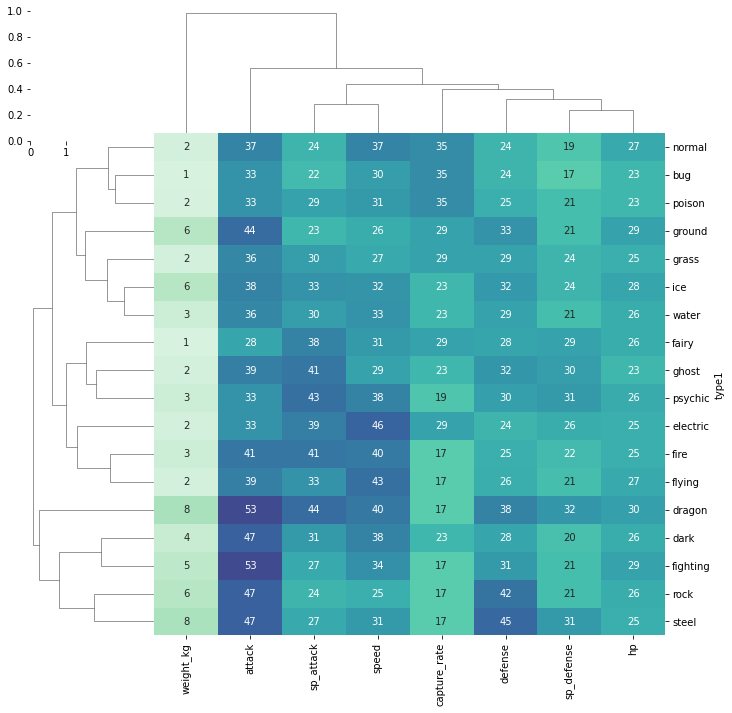

In [60]:
plt.figure(figsize=(12,8))

sns.clustermap(normalized_df3_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','weight_kg', 'capture_rate']].median()
            ,annot=True,cbar=False,cmap="mako_r",fmt='.0f',vmin=0,vmax=80)
plt.show();

<Figure size 864x576 with 0 Axes>

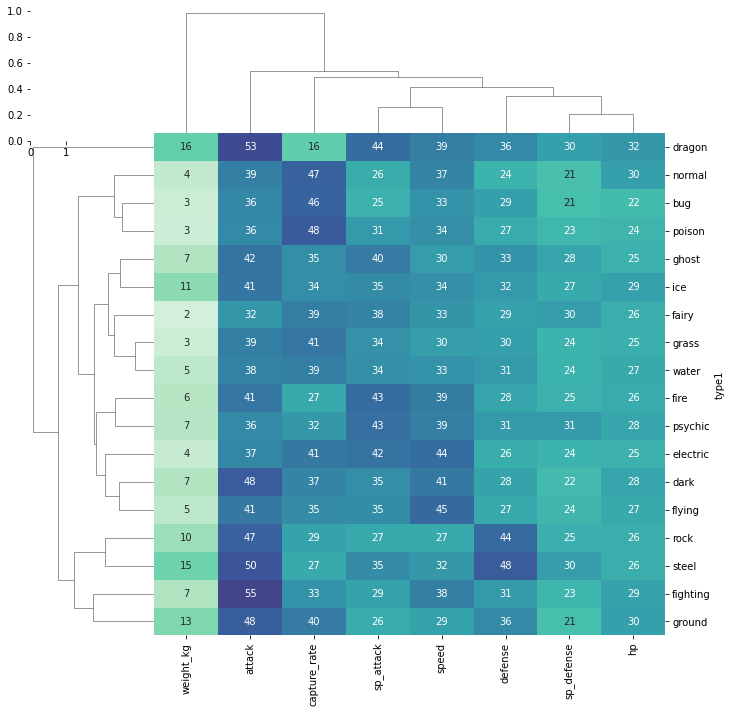

In [61]:
plt.figure(figsize=(12,8))

sns.clustermap(normalized_df3_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed','weight_kg', 'capture_rate']].mean()
            ,annot=True,cbar=False,cmap="mako_r",fmt='.0f',vmin=0,vmax=80)
plt.show();

### to spider plots

In [62]:
normalized_df3_type.head()

attack  base_total  capture_rate  defense   
name      type1  is_legendary                                              
Bulbasaur poison 0               24.0        23.0          17.0     20.0  \
          grass  0               24.0        23.0          17.0     20.0   
Ivysaur   poison 0               32.0        38.0          17.0     26.0   
          grass  0               32.0        38.0          17.0     26.0   
Venusaur  poison 0               53.0        74.0          17.0     52.0   

                               height_m    hp  sp_attack  sp_defense  speed   
name      type1  is_legendary                                                 
Bulbasaur poison 0                  4.0  17.0       30.0        21.0   23.0  \
          grass  0                  4.0  17.0       30.0        21.0   23.0   
Ivysaur   poison 0                  6.0  23.0       38.0        29.0   31.0   
          grass  0                  6.0  23.0       38.0        29.0   31.0   
Venusaur  poison 0                 13.0  31.0       61.0        48.0   43.0   

                               weight_kg  
name      type1  is_legendary             
Bulbasaur poison 0                   1.0  
          grass  0                   1.0  
Ivysaur   poison 0                   1.0  
          grass  0                   1.0  
Venusaur  poison 0                  10.0

In [63]:
# bez HP
norm_df_type =normalized_df3_type.drop(columns =['base_total', 'capture_rate', 'height_m', 'weight_kg', 'hp'], axis= 1)

In [64]:
# z HP
norm_df_type_hp =normalized_df3_type.drop(columns =['base_total', 'capture_rate', 'height_m', 'weight_kg'], axis= 1)

In [65]:
norm_df_type

attack  defense  sp_attack  sp_defense  speed
name      type1   is_legendary                                               
Bulbasaur poison  0               24.0     20.0       30.0        21.0   23.0
          grass   0               24.0     20.0       30.0        21.0   23.0
Ivysaur   poison  0               32.0     26.0       38.0        29.0   31.0
          grass   0               32.0     26.0       38.0        29.0   31.0
Venusaur  poison  0               53.0     52.0       61.0        48.0   43.0
...                                ...      ...        ...         ...    ...
Guzzlord  dragon  1               53.0     21.0       47.0        16.0   22.0
          dark    1               53.0     21.0       47.0        16.0   22.0
Necrozma  psychic 1               57.0     43.0       64.0        33.0   42.0
Magearna  fairy   1               50.0     49.0       65.0        45.0   34.0
          steel   1               50.0     49.0       65.0        45.0   34.0

[1211 rows x 5 columns]

In [66]:
# bez HP
df_type_median = norm_df_type.groupby('type1').median()
df_type_median

attack  defense  sp_attack  sp_defense  speed
type1                                                  
bug         33.0     24.0       22.0        17.0   30.0
dark        47.0     28.0       31.0        20.5   38.0
dragon      53.0     38.0       44.0        32.0   40.5
electric    33.0     24.0       39.0        26.0   46.0
fairy       28.0     28.0       38.0        29.0   31.0
fighting    53.0     31.0       27.0        21.0   34.0
fire        41.0     25.0       41.0        22.0   40.0
flying      39.0     25.5       33.0        21.0   43.0
ghost       39.0     32.0       41.0        30.0   29.0
grass       36.0     29.0       30.0        24.0   27.0
ground      44.0     33.0       23.0        21.0   26.0
ice         37.5     31.5       33.0        24.0   32.5
normal      37.0     24.0       24.0        19.0   37.0
poison      33.0     25.0       29.0        21.0   31.0
psychic     33.0     29.5       43.0        31.0   37.5
rock        47.0     42.0       24.0        21.0   25.0
steel       47.0     45.0       27.0        31.0   31.0
water       36.0     29.0       30.0        21.0   33.0

In [67]:
# z HP
df_type_median_hp = norm_df_type_hp.groupby('type1').median()

In [68]:
# Bez HP
df_type_median['max']=df_type_median.max(axis=1)
df_type_median['min']=df_type_median.min(axis=1)
df_type_median['diff']=df_type_median['max']-df_type_median['min']


In [69]:
# Z HP
df_type_median_hp['max']=df_type_median_hp.max(axis=1)
df_type_median_hp['min']=df_type_median_hp.min(axis=1)
df_type_median_hp['diff']=df_type_median_hp['max']-df_type_median_hp['min']

In [70]:
# bez HP
df_spider =df_type_median.sort_values('diff', ascending =False)
df_spider

attack  defense  sp_attack  sp_defense  speed   max   min  diff
type1                                                                    
fighting    53.0     31.0       27.0        21.0   34.0  53.0  21.0  32.0
dark        47.0     28.0       31.0        20.5   38.0  47.0  20.5  26.5
rock        47.0     42.0       24.0        21.0   25.0  47.0  21.0  26.0
ground      44.0     33.0       23.0        21.0   26.0  44.0  21.0  23.0
electric    33.0     24.0       39.0        26.0   46.0  46.0  24.0  22.0
flying      39.0     25.5       33.0        21.0   43.0  43.0  21.0  22.0
dragon      53.0     38.0       44.0        32.0   40.5  53.0  32.0  21.0
steel       47.0     45.0       27.0        31.0   31.0  47.0  27.0  20.0
fire        41.0     25.0       41.0        22.0   40.0  41.0  22.0  19.0
normal      37.0     24.0       24.0        19.0   37.0  37.0  19.0  18.0
bug         33.0     24.0       22.0        17.0   30.0  33.0  17.0  16.0
water       36.0     29.0       30.0        21.0   33.0  36.0  21.0  15.0
ice         37.5     31.5       33.0        24.0   32.5  37.5  24.0  13.5
psychic     33.0     29.5       43.0        31.0   37.5  43.0  29.5  13.5
poison      33.0     25.0       29.0        21.0   31.0  33.0  21.0  12.0
ghost       39.0     32.0       41.0        30.0   29.0  41.0  29.0  12.0
grass       36.0     29.0       30.0        24.0   27.0  36.0  24.0  12.0
fairy       28.0     28.0       38.0        29.0   31.0  38.0  28.0  10.0

In [71]:
# z HP
df_spider_hp =df_type_median_hp.sort_values('diff', ascending =False)
df_spider_hp

attack  defense    hp  sp_attack  sp_defense  speed   max   min   
type1                                                                       
fighting    53.0     31.0  29.0       27.0        21.0   34.0  53.0  21.0  \
dark        47.0     28.0  26.0       31.0        20.5   38.0  47.0  20.5   
rock        47.0     42.0  26.0       24.0        21.0   25.0  47.0  21.0   
dragon      53.0     38.0  29.5       44.0        32.0   40.5  53.0  29.5   
ground      44.0     33.0  29.0       23.0        21.0   26.0  44.0  21.0   
electric    33.0     24.0  25.0       39.0        26.0   46.0  46.0  24.0   
steel       47.0     45.0  25.0       27.0        31.0   31.0  47.0  25.0   
flying      39.0     25.5  27.0       33.0        21.0   43.0  43.0  21.0   
fire        41.0     25.0  25.0       41.0        22.0   40.0  41.0  22.0   
ghost       39.0     32.0  23.0       41.0        30.0   29.0  41.0  23.0   
normal      37.0     24.0  27.0       24.0        19.0   37.0  37.0  19.0   
psychic     33.0     29.5  26.5       43.0        31.0   37.5  43.0  26.5   
bug         33.0     24.0  23.0       22.0        17.0   30.0  33.0  17.0   
water       36.0     29.0  26.0       30.0        21.0   33.0  36.0  21.0   
ice         37.5     31.5  28.0       33.0        24.0   32.5  37.5  24.0   
poison      33.0     25.0  23.0       29.0        21.0   31.0  33.0  21.0   
fairy       28.0     28.0  26.0       38.0        29.0   31.0  38.0  26.0   
grass       36.0     29.0  25.0       30.0        24.0   27.0  36.0  24.0   

          diff  
type1           
fighting  32.0  
dark      26.5  
rock      26.0  
dragon    23.5  
ground    23.0  
electric  22.0  
steel     22.0  
flying    22.0  
fire      19.0  
ghost     18.0  
normal    18.0  
psychic   16.5  
bug       16.0  
water     15.0  
ice       13.5  
poison    12.0  
fairy     12.0  
grass     12.0

In [72]:
#dt_type_median['strategy']= dt_type_median['diff'].map({'Legit':0,'Fraud':1})

In [73]:
def assign_strategy(row):
    if row['diff'] <15:
        val = 'balanced'
    elif row['diff'] <25:
        val = 'mixed'
    else:
        val = 'specialist'
    return val

In [74]:
# bez HP
df_type_median['strategy'] = df_type_median.apply(assign_strategy, axis=1)

In [75]:
# Z HP
df_type_median_hp['strategy'] = df_type_median_hp.apply(assign_strategy, axis=1)

In [76]:
df_to_countplot = df_type_median.sort_values('strategy')

<AxesSubplot: xlabel='strategy', ylabel='count'>

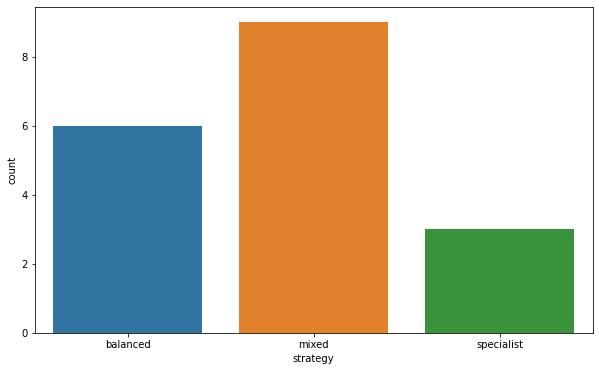

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_to_countplot, x ='strategy')

In [78]:
df_to_countplot.to_csv('poke_normalized.csv')

In [79]:
# bez HP dla median zagregowanych dla typu
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = df_spider.iloc[17:18, :]
y = df_spider.iloc[:1, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense', 'speed']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "most balanced: FAIRY" ,
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "most specialized: FIGHTING",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 60]), 
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 60]
    ),

),
)

fig.show(renderer='iframe_connected')
    

### Z HP

In [80]:
# z HP dla median zagregowanych dla typu
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = df_spider_hp.iloc[17:18, :]
y = df_spider_hp.iloc[:1, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp', 'speed']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "most balanced: FAIRY" ,
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "most specialized: FIGHTING",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],  y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 60]), 
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 60]
    ),

),
)

fig.show(renderer='iframe_connected')
    

### BEZ HP

In [81]:
norm_df_type

attack  defense  sp_attack  sp_defense  speed
name      type1   is_legendary                                               
Bulbasaur poison  0               24.0     20.0       30.0        21.0   23.0
          grass   0               24.0     20.0       30.0        21.0   23.0
Ivysaur   poison  0               32.0     26.0       38.0        29.0   31.0
          grass   0               32.0     26.0       38.0        29.0   31.0
Venusaur  poison  0               53.0     52.0       61.0        48.0   43.0
...                                ...      ...        ...         ...    ...
Guzzlord  dragon  1               53.0     21.0       47.0        16.0   22.0
          dark    1               53.0     21.0       47.0        16.0   22.0
Necrozma  psychic 1               57.0     43.0       64.0        33.0   42.0
Magearna  fairy   1               50.0     49.0       65.0        45.0   34.0
          steel   1               50.0     49.0       65.0        45.0   34.0

[1211 rows x 5 columns]

In [82]:
norm_df_type['max']=norm_df_type.max(axis=1)
norm_df_type['min']=norm_df_type.min(axis=1)
norm_df_type['diff']=norm_df_type['max']-norm_df_type['min']

In [83]:
norm_df_type.sort_values(['diff','name'], ascending =True)

attack  defense  sp_attack  sp_defense  speed   
name      type1  is_legendary                                                  
Bayleef   grass  0               32.0     33.0       29.0        29.0   31.0  \
Dewgong   ice    0               36.0     33.0       33.0        36.0   37.0   
          water  0               36.0     33.0       33.0        36.0   37.0   
Wartortle water  0               32.0     33.0       30.0        29.0   30.0   
Gulpin    poison 0               21.0     21.0       18.0        16.0   20.0   
...                               ...      ...        ...         ...    ...   
Steelix   steel  0               67.0    100.0       24.0        36.0   14.0   
Kartana   steel  1               98.0     56.0       27.0         5.0   59.0   
          grass  1               98.0     56.0       27.0         5.0   59.0   
Shuckle   rock   0                3.0    100.0        0.0       100.0    0.0   
          bug    0                3.0    100.0        0.0       100.0    0.0   

                                 max   min   diff  
name      type1  is_legendary                      
Bayleef   grass  0              33.0  29.0    4.0  
Dewgong   ice    0              37.0  33.0    4.0  
          water  0              37.0  33.0    4.0  
Wartortle water  0              33.0  29.0    4.0  
Gulpin    poison 0              21.0  16.0    5.0  
...                              ...   ...    ...  
Steelix   steel  0             100.0  14.0   86.0  
Kartana   steel  1              98.0   5.0   93.0  
          grass  1              98.0   5.0   93.0  
Shuckle   rock   0             100.0   0.0  100.0  
          bug    0             100.0   0.0  100.0  

[1211 rows x 8 columns]

In [84]:
norm_df_type.loc['Dewgong']

attack  defense  sp_attack  sp_defense  speed   max   min   
type1 is_legendary                                                              
ice   0               36.0     33.0       33.0        36.0   37.0  37.0  33.0  \
water 0               36.0     33.0       33.0        36.0   37.0  37.0  33.0   

                    diff  
type1 is_legendary        
ice   0              4.0  
water 0              4.0

In [85]:
norm_df_type.loc['Shuckle']

attack  defense  sp_attack  sp_defense  speed    max  min   
type1 is_legendary                                                              
rock  0                3.0    100.0        0.0       100.0    0.0  100.0  0.0  \
bug   0                3.0    100.0        0.0       100.0    0.0  100.0  0.0   

                     diff  
type1 is_legendary         
rock  0             100.0  
bug   0             100.0

In [86]:
norm_df_type.loc['Kartana']

attack  defense  sp_attack  sp_defense  speed   max  min   
type1 is_legendary                                                             
steel 1               98.0     56.0       27.0         5.0   59.0  98.0  5.0  \
grass 1               98.0     56.0       27.0         5.0   59.0  98.0  5.0   

                    diff  
type1 is_legendary        
steel 1             93.0  
grass 1             93.0

In [87]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = norm_df_type.loc['Dewgong']
y = norm_df_type.loc['Shuckle']
z= norm_df_type.loc['Kartana']
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','speed']

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'}]*3]*1)

fig.add_trace(go.Scatterpolar(
      name = "Dewgong:   water | ice",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "Shuckle:      bug | rock",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
      name = "Kartana:      grass | steel ",
      r = [z['speed'].values[0],
             z['attack'].values[0],
             z['sp_attack'].values[0],
             z['defense'].values[0],
             z['sp_defense'].values[0],z['speed'].values[0]],
      theta = theta,
     
    ), 1, 3)

fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    polar3 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),

)

fig.show(renderer='iframe_connected')
    
  

In [88]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = norm_df_type_hp.loc['Dewgong']
y = norm_df_type_hp.loc['Shuckle']
z= norm_df_type_hp.loc['Kartana']
theta=['SPD','ATT', 'SP_ATT','DEF', 'SP_DEF','HP','SPD']

fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'}]*3]*1)

fig.add_trace(go.Scatterpolar(
      name = "Dewgong:   water | ice",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0], x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "Shuckle:      bug | rock",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0], y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
      name = "Kartana:      grass | steel ",
      r = [z['speed'].values[0],
             z['attack'].values[0],
             z['sp_attack'].values[0],
             z['defense'].values[0],
             z['sp_defense'].values[0], z['hp'].values[0],z['speed'].values[0]],
      theta = theta,
     
    ), 1, 3)

fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    polar3 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),

)

fig.show(renderer='iframe_connected')
    
  

In [89]:
df= pd.read_csv("pokemon.csv")

In [90]:
df[df['name']=='Dewgong']

abilities  against_bug  against_dark   
86  ['Thick Fat', 'Hydration', 'Ice Body']          1.0           1.0  \

    against_dragon  against_electric  against_fairy  against_fight   
86             1.0               2.0            1.0            2.0  \

    against_fire  against_flying  against_ghost  ...  percentage_male   
86           1.0             1.0            1.0  ...             50.0  \

    pokedex_number  sp_attack  sp_defense  speed  type1  type2  weight_kg   
86              87         70          95     70  water    ice      120.0  \

    generation  is_legendary  
86           1             0  

[1 rows x 41 columns]

In [91]:
df[df['name']=='Shuckle']

abilities  against_bug  against_dark   
212  ['Sturdy', 'Gluttony', 'Contrary']          1.0           1.0  \

     against_dragon  against_electric  against_fairy  against_fight   
212             1.0               1.0            1.0            1.0  \

     against_fire  against_flying  against_ghost  ...  percentage_male   
212           1.0             1.0            1.0  ...             50.0  \

     pokedex_number  sp_attack  sp_defense  speed  type1  type2  weight_kg   
212             213         10         230      5    bug   rock       20.5  \

     generation  is_legendary  
212           2             0  

[1 rows x 41 columns]

In [92]:
df[df['name']=='Kartana']

abilities  against_bug  against_dark  against_dragon   
797  ['Beast Boost']          1.0           1.0             0.5  \

     against_electric  against_fairy  against_fight  against_fire   
797               0.5            0.5            2.0           4.0  \

     against_flying  against_ghost  ...  percentage_male  pokedex_number   
797             1.0            1.0  ...              NaN             798  \

     sp_attack  sp_defense  speed  type1  type2  weight_kg  generation   
797         59          31    109  grass  steel        0.1           7  \

     is_legendary  
797             1  

[1 rows x 41 columns]

In [93]:
norm_df_type.loc['Arceus']

attack  defense  sp_attack  sp_defense  speed   max   
type1  is_legendary                                                        
normal 1               64.0     51.0       60.0        48.0   66.0  66.0  \

                      min  diff  
type1  is_legendary              
normal 1             48.0  18.0

In [94]:
norm_df_type.loc['Sliggoo']

attack  defense  sp_attack  sp_defense  speed   max   
type1  is_legendary                                                        
dragon 0               39.0     21.0       40.0        44.0   31.0  44.0  \

                      min  diff  
type1  is_legendary              
dragon 0             21.0  23.0

In [95]:
df[df['name']=='Sliggoo']

abilities  against_bug  against_dark   
704  ['Sap Sipper', 'Hydration', 'Gooey']          1.0           1.0  \

     against_dragon  against_electric  against_fairy  against_fight   
704             2.0               0.5            2.0            1.0  \

     against_fire  against_flying  against_ghost  ...  percentage_male   
704           0.5             1.0            1.0  ...             50.0  \

     pokedex_number  sp_attack  sp_defense  speed   type1  type2  weight_kg   
704             705         83         113     60  dragon    NaN       17.5  \

     generation  is_legendary  
704           6             0  

[1 rows x 41 columns]

In [96]:
norm_df_type.loc['Magikarp']

attack  defense  sp_attack  sp_defense  speed   max  min   
type1 is_legendary                                                             
water 0                3.0     22.0        3.0         0.0   43.0  43.0  0.0  \

                    diff  
type1 is_legendary        
water 0             43.0

In [97]:
df[df['name']=='Magikarp']

abilities  against_bug  against_dark  against_dragon   
128  ['Swift Swim', 'Rattled']          1.0           1.0             1.0  \

     against_electric  against_fairy  against_fight  against_fire   
128               2.0            1.0            1.0           0.5  \

     against_flying  against_ghost  ...  percentage_male  pokedex_number   
128             1.0            1.0  ...             50.0             129  \

     sp_attack  sp_defense  speed  type1  type2  weight_kg  generation   
128         15          20     80  water    NaN       10.0           1  \

     is_legendary  
128             0  

[1 rows x 41 columns]

In [98]:
norm_df_type.loc['Jigglypuff']

attack  defense  sp_attack  sp_defense  speed   max  min   
type1  is_legendary                                                             
fairy  0               22.0      7.0       19.0         2.0    9.0  22.0  2.0  \
normal 0               22.0      7.0       19.0         2.0    9.0  22.0  2.0   

                     diff  
type1  is_legendary        
fairy  0             20.0  
normal 0             20.0

In [99]:
df[df['name']=='Jigglypuff']

abilities  against_bug  against_dark   
38  ['Cute Charm', 'Competitive', 'Friend Guard']          0.5           0.5  \

    against_dragon  against_electric  against_fairy  against_fight   
38             0.0               1.0            1.0            1.0  \

    against_fire  against_flying  against_ghost  ...  percentage_male   
38           1.0             1.0            0.0  ...             24.6  \

    pokedex_number  sp_attack  sp_defense  speed   type1  type2  weight_kg   
38              39         45          25     20  normal  fairy        5.5  \

    generation  is_legendary  
38           1             0  

[1 rows x 41 columns]

In [100]:
norm_df_type.loc['Togetic']

attack  defense  sp_attack  sp_defense  speed   max   
type1  is_legendary                                                        
flying 0               19.0     36.0       38.0        40.0   20.0  40.0  \
fairy  0               19.0     36.0       38.0        40.0   20.0  40.0   

                      min  diff  
type1  is_legendary              
flying 0             19.0  21.0  
fairy  0             19.0  21.0

In [101]:
df[df['name']=='Togetic']

abilities  against_bug  against_dark   
175  ['Hustle', 'Serene Grace', 'Super Luck']         0.25           0.5  \

     against_dragon  against_electric  against_fairy  against_fight   
175             0.0               2.0            1.0           0.25  \

     against_fire  against_flying  against_ghost  ...  percentage_male   
175           1.0             1.0            1.0  ...             88.1  \

     pokedex_number  sp_attack  sp_defense  speed  type1   type2  weight_kg   
175             176         80         105     40  fairy  flying        3.2  \

     generation  is_legendary  
175           2             0  

[1 rows x 41 columns]

In [102]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = norm_df_type.loc['Magikarp']
y = norm_df_type.loc['Togetic']
z= norm_df_type.loc['Sliggoo']
k =norm_df_type.loc['Jigglypuff']
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','speed']

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolar(
      name = "Magikarp:    water |           (Radek B)",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "Togetic:        fairy | flying    (Marta J)",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
      name = "Sliggoo:       dragon |          (Asia R)  ",
      r = [z['speed'].values[0],
             z['attack'].values[0],
             z['sp_attack'].values[0],
             z['defense'].values[0],
             z['sp_defense'].values[0],z['speed'].values[0]],
      theta = theta,
     
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
      name = "Jigglypuff:     normal | fairy   (Asia K)",
      r = [k['speed'].values[0],
             k['attack'].values[0],
             k['sp_attack'].values[0],
             k['defense'].values[0],
             k['sp_defense'].values[0],k['speed'].values[0]],
      theta = theta,
     
    ), 2,2)


fig.update_traces(fill='toself')
fig.update_layout(width=1000, height=800,
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
    polar3 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
     polar4 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),

)

fig.show(renderer='iframe_connected')
    
  

In [103]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = norm_df_type.loc['Magikarp']
y = norm_df_type.loc['Togetic']
z= norm_df_type.loc['Sliggoo']
k =norm_df_type.loc['Jigglypuff']
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','speed']

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolar(
      name = "Magikarp:  Radek",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "Togetic:     Marta",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
      name = "Sliggoo:     Asia R",
      r = [z['speed'].values[0],
             z['attack'].values[0],
             z['sp_attack'].values[0],
             z['defense'].values[0],
             z['sp_defense'].values[0],z['speed'].values[0]],
      theta = theta,
     
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
      name = "Jigglypuff:  Asia K",
      r = [k['speed'].values[0],
             k['attack'].values[0],
             k['sp_attack'].values[0],
             k['defense'].values[0],
             k['sp_defense'].values[0],k['speed'].values[0]],
      theta = theta,
     
    ), 2,2)


fig.update_traces(fill='toself')
fig.update_layout(width=1000, height=800,
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
    polar3 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
     polar4 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),

)

fig.show(renderer='iframe_connected')
    
  

## Z HP

In [104]:
norm_df_type_hp

attack  defense    hp  sp_attack  sp_defense   
name      type1   is_legendary                                                 
Bulbasaur poison  0               24.0     20.0  17.0       30.0        21.0  \
          grass   0               24.0     20.0  17.0       30.0        21.0   
Ivysaur   poison  0               32.0     26.0  23.0       38.0        29.0   
          grass   0               32.0     26.0  23.0       38.0        29.0   
Venusaur  poison  0               53.0     52.0  31.0       61.0        48.0   
...                                ...      ...   ...        ...         ...   
Guzzlord  dragon  1               53.0     21.0  87.0       47.0        16.0   
          dark    1               53.0     21.0  87.0       47.0        16.0   
Necrozma  psychic 1               57.0     43.0  38.0       64.0        33.0   
Magearna  fairy   1               50.0     49.0  31.0       65.0        45.0   
          steel   1               50.0     49.0  31.0       65.0        45.0   

                                speed  
name      type1   is_legendary         
Bulbasaur poison  0              23.0  
          grass   0              23.0  
Ivysaur   poison  0              31.0  
          grass   0              31.0  
Venusaur  poison  0              43.0  
...                               ...  
Guzzlord  dragon  1              22.0  
          dark    1              22.0  
Necrozma  psychic 1              42.0  
Magearna  fairy   1              34.0  
          steel   1              34.0  

[1211 rows x 6 columns]

In [105]:
norm_df_type_hp['max']=norm_df_type_hp.max(axis=1)
norm_df_type_hp['min']=norm_df_type_hp.min(axis=1)
norm_df_type_hp['diff']=norm_df_type_hp['max']-norm_df_type_hp['min']

In [106]:
norm_df_type_hp

attack  defense    hp  sp_attack  sp_defense   
name      type1   is_legendary                                                 
Bulbasaur poison  0               24.0     20.0  17.0       30.0        21.0  \
          grass   0               24.0     20.0  17.0       30.0        21.0   
Ivysaur   poison  0               32.0     26.0  23.0       38.0        29.0   
          grass   0               32.0     26.0  23.0       38.0        29.0   
Venusaur  poison  0               53.0     52.0  31.0       61.0        48.0   
...                                ...      ...   ...        ...         ...   
Guzzlord  dragon  1               53.0     21.0  87.0       47.0        16.0   
          dark    1               53.0     21.0  87.0       47.0        16.0   
Necrozma  psychic 1               57.0     43.0  38.0       64.0        33.0   
Magearna  fairy   1               50.0     49.0  31.0       65.0        45.0   
          steel   1               50.0     49.0  31.0       65.0        45.0   

                                speed   max   min  diff  
name      type1   is_legendary                           
Bulbasaur poison  0              23.0  30.0  17.0  13.0  
          grass   0              23.0  30.0  17.0  13.0  
Ivysaur   poison  0              31.0  38.0  23.0  15.0  
          grass   0              31.0  38.0  23.0  15.0  
Venusaur  poison  0              43.0  61.0  31.0  30.0  
...                               ...   ...   ...   ...  
Guzzlord  dragon  1              22.0  87.0  16.0  71.0  
          dark    1              22.0  87.0  16.0  71.0  
Necrozma  psychic 1              42.0  64.0  33.0  31.0  
Magearna  fairy   1              34.0  65.0  31.0  34.0  
          steel   1              34.0  65.0  31.0  34.0  

[1211 rows x 9 columns]

In [107]:
norm_df_type_hp.sort_values(['diff','name'], ascending =True)

attack  defense     hp  sp_attack  sp_defense   
name    type1  is_legendary                                                  
Dewgong ice    0               36.0     33.0   35.0       33.0        36.0  \
        water  0               36.0     33.0   35.0       33.0        36.0   
Lotad   grass  0               14.0     11.0   15.0       16.0        14.0   
        water  0               14.0     11.0   15.0       16.0        14.0   
Seel    water  0               22.0     22.0   25.0       19.0        24.0   
...                             ...      ...    ...        ...         ...   
Kartana grass  1               98.0     56.0   23.0       27.0         5.0   
Blissey normal 0                3.0      2.0  100.0       35.0        55.0   
Chansey normal 0                0.0      0.0   98.0       14.0        40.0   
Shuckle rock   0                3.0    100.0    7.0        0.0       100.0   
        bug    0                3.0    100.0    7.0        0.0       100.0   

                             speed    max   min   diff  
name    type1  is_legendary                             
Dewgong ice    0              37.0   37.0  33.0    4.0  
        water  0              37.0   37.0  33.0    4.0  
Lotad   grass  0              14.0   16.0  11.0    5.0  
        water  0              14.0   16.0  11.0    5.0  
Seel    water  0              23.0   25.0  19.0    6.0  
...                            ...    ...   ...    ...  
Kartana grass  1              59.0   98.0   5.0   93.0  
Blissey normal 0              29.0  100.0   2.0   98.0  
Chansey normal 0              26.0   98.0   0.0   98.0  
Shuckle rock   0               0.0  100.0   0.0  100.0  
        bug    0               0.0  100.0   0.0  100.0  

[1211 rows x 9 columns]

<AxesSubplot: xlabel='diff', ylabel='Count'>

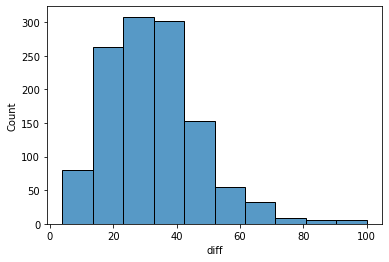

In [108]:
sns.histplot(data= norm_df_type_hp['diff'], bins = 10)

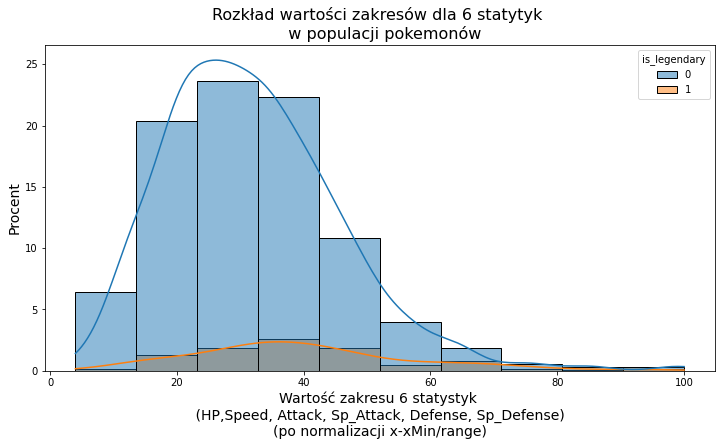

In [109]:
plt.figure(figsize=(12,6))
sns.histplot(data =norm_df_type_hp, x =norm_df_type_hp['diff'], hue ='is_legendary' , kde=True, bins = 10, stat = 'percent')
plt.ylabel('Procent', fontsize = 14)
plt.xlabel("Wartość zakresu 6 statystyk \n (HP,Speed, Attack, Sp_Attack, Defense, Sp_Defense) \n(po normalizacji x-xMin/range)", fontsize = 14)
plt.title("Rozkład wartości zakresów dla 6 statytyk \n  w populacji pokemonów", fontsize = 16)
plt.show()

In [110]:
def assign_strategy(row):
    if row['diff'] <25:
        val = 'balanced'
    elif row['diff'] <40:
        val = 'mixed'
    else:
        val = 'specialist'
    return val

In [111]:
norm_df_type_hp['strategy'] = norm_df_type_hp.apply(assign_strategy, axis=1)

In [112]:
norm_df_type_hp

attack  defense    hp  sp_attack  sp_defense   
name      type1   is_legendary                                                 
Bulbasaur poison  0               24.0     20.0  17.0       30.0        21.0  \
          grass   0               24.0     20.0  17.0       30.0        21.0   
Ivysaur   poison  0               32.0     26.0  23.0       38.0        29.0   
          grass   0               32.0     26.0  23.0       38.0        29.0   
Venusaur  poison  0               53.0     52.0  31.0       61.0        48.0   
...                                ...      ...   ...        ...         ...   
Guzzlord  dragon  1               53.0     21.0  87.0       47.0        16.0   
          dark    1               53.0     21.0  87.0       47.0        16.0   
Necrozma  psychic 1               57.0     43.0  38.0       64.0        33.0   
Magearna  fairy   1               50.0     49.0  31.0       65.0        45.0   
          steel   1               50.0     49.0  31.0       65.0        45.0   

                                speed   max   min  diff    strategy  
name      type1   is_legendary                                       
Bulbasaur poison  0              23.0  30.0  17.0  13.0    balanced  
          grass   0              23.0  30.0  17.0  13.0    balanced  
Ivysaur   poison  0              31.0  38.0  23.0  15.0    balanced  
          grass   0              31.0  38.0  23.0  15.0    balanced  
Venusaur  poison  0              43.0  61.0  31.0  30.0       mixed  
...                               ...   ...   ...   ...         ...  
Guzzlord  dragon  1              22.0  87.0  16.0  71.0  specialist  
          dark    1              22.0  87.0  16.0  71.0  specialist  
Necrozma  psychic 1              42.0  64.0  33.0  31.0       mixed  
Magearna  fairy   1              34.0  65.0  31.0  34.0       mixed  
          steel   1              34.0  65.0  31.0  34.0       mixed  

[1211 rows x 10 columns]

<AxesSubplot: xlabel='strategy', ylabel='count'>

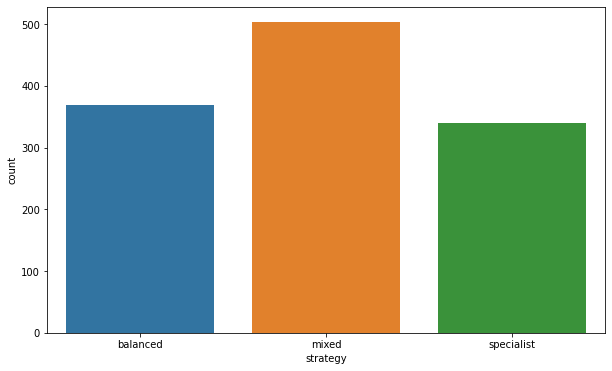

In [113]:
plt.figure(figsize=(10,6))
sns.countplot(data=norm_df_type_hp, x ='strategy')

In [114]:
norm_df_type_hp.to_csv('poke_specjalizacja_typy.csv')

In [199]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = norm_df_type_hp.loc['Rayquaza']
y = norm_df_type_hp.loc['Kyogre']
z= norm_df_type_hp.loc['Mewtwo']
k =norm_df_type_hp.loc['Shuckle']
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp','speed']

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolar(
      name = "Rayquaza",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "Kyogre",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
      name = "Mewtwo",
      r = [z['speed'].values[0],
             z['attack'].values[0],
             z['sp_attack'].values[0],
             z['defense'].values[0],
             z['sp_defense'].values[0],z['hp'].values[0],z['speed'].values[0]],
      theta = theta,
     
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
      name = "Shuckle",
      r = [k['speed'].values[0],
             k['attack'].values[0],
             k['sp_attack'].values[0],
             k['defense'].values[0],
             k['sp_defense'].values[0],k['hp'].values[0],k['speed'].values[0]],
      theta = theta,
     
    ), 2,2)


fig.update_traces(fill='toself')
fig.update_layout(width=1000, height=800,
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    polar3 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
     polar4 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),

)

fig.show(renderer='iframe_connected')
    
  

In [115]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = norm_df_type_hp.loc['Magikarp']
y = norm_df_type_hp.loc['Togetic']
z= norm_df_type_hp.loc['Sliggoo']
k =norm_df_type_hp.loc['Jigglypuff']
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp','speed']

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolar(
      name = "Magikarp:  Radek",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "Togetic:     Marta",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
      name = "Sliggoo:     Asia R",
      r = [z['speed'].values[0],
             z['attack'].values[0],
             z['sp_attack'].values[0],
             z['defense'].values[0],
             z['sp_defense'].values[0],z['hp'].values[0],z['speed'].values[0]],
      theta = theta,
     
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
      name = "Jigglypuff:  Asia K",
      r = [k['speed'].values[0],
             k['attack'].values[0],
             k['sp_attack'].values[0],
             k['defense'].values[0],
             k['sp_defense'].values[0],k['hp'].values[0],k['speed'].values[0]],
      theta = theta,
     
    ), 2,2)


fig.update_traces(fill='toself')
fig.update_layout(width=1000, height=800,
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
    polar3 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),
     polar4 = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 50]),
    ),

)

fig.show(renderer='iframe_connected')
    
  

In [116]:
normalized_df_type=round(((df_to_norm_type-df_to_norm_type.min())/(df_to_norm_type.max()-df_to_norm_type.min())*100),0)

In [117]:
normalized_df_type.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1211 entries, ('Bulbasaur', 'poison', 0) to ('Magearna', 'steel', 1)
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attack      1211 non-null   float64
 1   base_total  1211 non-null   float64
 2   defense     1211 non-null   float64
 3   hp          1211 non-null   float64
 4   sp_attack   1211 non-null   float64
 5   sp_defense  1211 non-null   float64
 6   speed       1211 non-null   float64
dtypes: float64(7)
memory usage: 110.4+ KB


In [118]:
normalized_df_type=normalized_df_type.drop(columns= ['base_total'], axis=1)

In [119]:
normalized_df_type

attack  defense    hp  sp_attack  sp_defense   
name      type1   is_legendary                                                 
Bulbasaur poison  0               24.0     20.0  17.0       30.0        21.0  \
          grass   0               24.0     20.0  17.0       30.0        21.0   
Ivysaur   poison  0               32.0     26.0  23.0       38.0        29.0   
          grass   0               32.0     26.0  23.0       38.0        29.0   
Venusaur  poison  0               53.0     52.0  31.0       61.0        48.0   
...                                ...      ...   ...        ...         ...   
Guzzlord  dragon  1               53.0     21.0  87.0       47.0        16.0   
          dark    1               53.0     21.0  87.0       47.0        16.0   
Necrozma  psychic 1               57.0     43.0  38.0       64.0        33.0   
Magearna  fairy   1               50.0     49.0  31.0       65.0        45.0   
          steel   1               50.0     49.0  31.0       65.0        45.0   

                                speed  
name      type1   is_legendary         
Bulbasaur poison  0              23.0  
          grass   0              23.0  
Ivysaur   poison  0              31.0  
          grass   0              31.0  
Venusaur  poison  0              43.0  
...                               ...  
Guzzlord  dragon  1              22.0  
          dark    1              22.0  
Necrozma  psychic 1              42.0  
Magearna  fairy   1              34.0  
          steel   1              34.0  

[1211 rows x 6 columns]

Text(0.5, 1.0, 'All Stats')

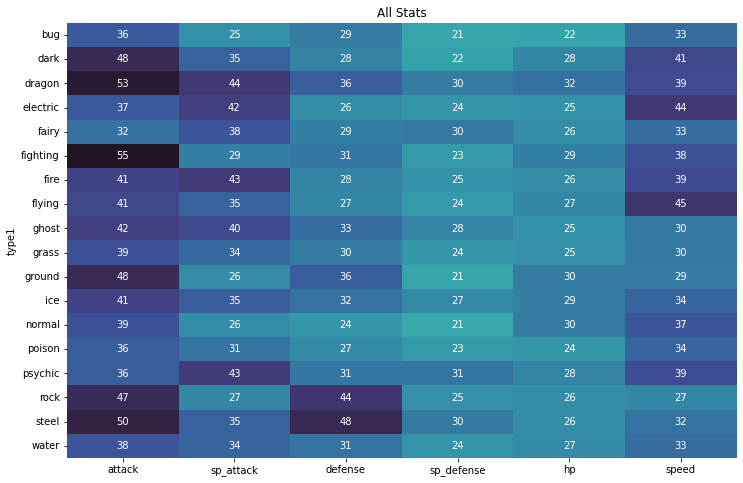

In [120]:
plt.figure(figsize=(12,8))

sns.heatmap(normalized_df_type.groupby('type1')
            [['attack','sp_attack','defense','sp_defense','hp','speed']].mean()
            ,annot=True,cbar=False,cmap='mako_r',fmt='.0f',vmin=0,vmax=60).set_title('All Stats')

In [121]:
normalized_df_non_legendary_type = normalized_df_type.xs(0, level="is_legendary")
normalized_df_legendary_type = normalized_df_type.xs(1, level="is_legendary")

In [122]:
normalized_df_non_legendary_type

attack  defense    hp  sp_attack  sp_defense  speed
name      type1                                                        
Bulbasaur poison      24.0     20.0  17.0       30.0        21.0   23.0
          grass       24.0     20.0  17.0       30.0        21.0   23.0
Ivysaur   poison      32.0     26.0  23.0       38.0        29.0   31.0
          grass       32.0     26.0  23.0       38.0        29.0   31.0
Venusaur  poison      53.0     52.0  31.0       61.0        48.0   43.0
...                    ...      ...   ...        ...         ...    ...
Jangmo-o  dragon      28.0     27.0  17.0       19.0        12.0   23.0
Hakamo-o  fighting    39.0     38.0  21.0       30.0        24.0   34.0
          dragon      39.0     38.0  21.0       30.0        24.0   34.0
Kommo-o   fighting    58.0     53.0  29.0       49.0        40.0   46.0
          dragon      58.0     53.0  29.0       49.0        40.0   46.0

[1097 rows x 6 columns]

In [123]:
non_leg_by_type_median = normalized_df_non_legendary_type.groupby('type1').median()
non_leg_by_type_median

attack  defense    hp  sp_attack  sp_defense  speed
type1                                                        
bug         32.5     24.0  22.0       22.0        18.0   29.0
dark        47.0     28.0  25.0       30.0        20.0   38.0
dragon      46.0     33.0  26.0       30.0        24.0   34.0
electric    32.0     24.0  23.0       38.0        24.0   37.0
fairy       25.0     27.0  23.0       30.0        26.0   26.0
fighting    53.0     29.0  27.0       24.0        21.0   34.0
fire        36.0     24.0  25.0       38.0        21.0   37.0
flying      38.0     24.0  25.0       30.0        19.0   43.0
ghost       37.0     31.5  23.0       35.5        27.5   25.5
grass       35.0     29.0  23.5       30.0        24.0   26.0
ground      44.0     33.0  27.0       22.0        19.0   26.0
ice         36.0     30.0  27.0       33.0        22.0   31.0
normal      36.0     24.0  27.0       23.0        19.0   36.5
poison      33.0     25.0  23.0       28.0        21.0   31.0
psychic     28.0     27.0  25.0       38.0        29.0   31.0
rock        44.0     42.0  26.0       24.0        21.0   23.0
steel       46.0     43.0  23.0       24.0        29.0   26.0
water       35.0     28.5  25.0       30.0        21.0   31.0

In [124]:
leg_by_type_median = normalized_df_legendary_type.groupby('type1').median()
leg_by_type_median

attack  defense    hp  sp_attack  sp_defense  speed
type1                                                        
bug         73.0     40.0  28.0       60.0        16.0   54.0
dark        53.0     38.0  49.0       66.0        33.0   54.0
dragon      64.0     42.0  39.0       76.0        38.0   49.0
electric    51.5     33.5  33.5       61.0        31.0   54.5
fairy       61.0     47.0  27.0       65.0        43.0   51.0
fighting    58.0     38.0  35.0       43.0        29.0   59.0
fire        58.0     42.0  39.0       62.0        38.0   49.0
flying      53.0     38.0  35.0       54.0        37.0   54.0
ghost       64.0     37.0  54.0       69.0        41.0   49.0
grass       54.0     42.0  35.0       43.0        36.0   59.0
ground      78.0     52.0  39.0       52.0        33.0   49.0
ice         44.0     42.0  35.0       49.0        50.0   46.0
normal      68.0     47.0  43.0       38.0        43.0   66.0
poison      27.0     19.0  43.0       64.0        53.0   56.0
psychic     53.0     42.0  38.0       49.0        40.0   54.0
rock        61.0     42.5  33.0       49.0        40.5   57.5
steel       53.0     47.0  35.0       54.5        38.0   51.0
water       53.0     42.0  35.0       65.0        45.0   49.0

### Calculating balanced VS Specialist

In [125]:
non_leg_by_type_median['max']=non_leg_by_type_median.max(axis=1)
non_leg_by_type_median['min']=non_leg_by_type_median.min(axis=1)
non_leg_by_type_median['diff']=non_leg_by_type_median['max']-non_leg_by_type_median['min']
non_leg_by_type_median['strategy']=non_leg_by_type_median.min(axis=1)

In [126]:
non_leg_by_type_median.sort_values('diff', ascending =False)

attack  defense    hp  sp_attack  sp_defense  speed   max   min   
type1                                                                       
fighting    53.0     29.0  27.0       24.0        21.0   34.0  53.0  21.0  \
dark        47.0     28.0  25.0       30.0        20.0   38.0  47.0  20.0   
ground      44.0     33.0  27.0       22.0        19.0   26.0  44.0  19.0   
flying      38.0     24.0  25.0       30.0        19.0   43.0  43.0  19.0   
steel       46.0     43.0  23.0       24.0        29.0   26.0  46.0  23.0   
rock        44.0     42.0  26.0       24.0        21.0   23.0  44.0  21.0   
dragon      46.0     33.0  26.0       30.0        24.0   34.0  46.0  24.0   
normal      36.0     24.0  27.0       23.0        19.0   36.5  36.5  19.0   
fire        36.0     24.0  25.0       38.0        21.0   37.0  38.0  21.0   
electric    32.0     24.0  23.0       38.0        24.0   37.0  38.0  23.0   
bug         32.5     24.0  22.0       22.0        18.0   29.0  32.5  18.0   
water       35.0     28.5  25.0       30.0        21.0   31.0  35.0  21.0   
ice         36.0     30.0  27.0       33.0        22.0   31.0  36.0  22.0   
ghost       37.0     31.5  23.0       35.5        27.5   25.5  37.0  23.0   
psychic     28.0     27.0  25.0       38.0        29.0   31.0  38.0  25.0   
poison      33.0     25.0  23.0       28.0        21.0   31.0  33.0  21.0   
grass       35.0     29.0  23.5       30.0        24.0   26.0  35.0  23.5   
fairy       25.0     27.0  23.0       30.0        26.0   26.0  30.0  23.0   

          diff  strategy  
type1                     
fighting  32.0      21.0  
dark      27.0      20.0  
ground    25.0      19.0  
flying    24.0      19.0  
steel     23.0      23.0  
rock      23.0      21.0  
dragon    22.0      22.0  
normal    17.5      17.5  
fire      17.0      17.0  
electric  15.0      15.0  
bug       14.5      14.5  
water     14.0      14.0  
ice       14.0      14.0  
ghost     14.0      14.0  
psychic   13.0      13.0  
poison    12.0      12.0  
grass     11.5      11.5  
fairy      7.0       7.0

In [127]:
leg_by_type_median['max']=leg_by_type_median.max(axis=1)
leg_by_type_median['min']=leg_by_type_median.min(axis=1)
leg_by_type_median['diff']=leg_by_type_median['max']-leg_by_type_median['min']

In [128]:
leg_by_type_median.sort_values('diff', ascending =False)

attack  defense    hp  sp_attack  sp_defense  speed   max   min   
type1                                                                       
bug         73.0     40.0  28.0       60.0        16.0   54.0  73.0  16.0  \
poison      27.0     19.0  43.0       64.0        53.0   56.0  64.0  19.0   
ground      78.0     52.0  39.0       52.0        33.0   49.0  78.0  33.0   
dragon      64.0     42.0  39.0       76.0        38.0   49.0  76.0  38.0   
fairy       61.0     47.0  27.0       65.0        43.0   51.0  65.0  27.0   
dark        53.0     38.0  49.0       66.0        33.0   54.0  66.0  33.0   
ghost       64.0     37.0  54.0       69.0        41.0   49.0  69.0  37.0   
normal      68.0     47.0  43.0       38.0        43.0   66.0  68.0  38.0   
water       53.0     42.0  35.0       65.0        45.0   49.0  65.0  35.0   
fighting    58.0     38.0  35.0       43.0        29.0   59.0  59.0  29.0   
electric    51.5     33.5  33.5       61.0        31.0   54.5  61.0  31.0   
rock        61.0     42.5  33.0       49.0        40.5   57.5  61.0  33.0   
fire        58.0     42.0  39.0       62.0        38.0   49.0  62.0  38.0   
grass       54.0     42.0  35.0       43.0        36.0   59.0  59.0  35.0   
steel       53.0     47.0  35.0       54.5        38.0   51.0  54.5  35.0   
flying      53.0     38.0  35.0       54.0        37.0   54.0  54.0  35.0   
psychic     53.0     42.0  38.0       49.0        40.0   54.0  54.0  38.0   
ice         44.0     42.0  35.0       49.0        50.0   46.0  50.0  35.0   

          diff  
type1           
bug       57.0  
poison    45.0  
ground    45.0  
dragon    38.0  
fairy     38.0  
dark      33.0  
ghost     32.0  
normal    30.0  
water     30.0  
fighting  30.0  
electric  30.0  
rock      28.0  
fire      24.0  
grass     24.0  
steel     19.5  
flying    19.0  
psychic   16.0  
ice       15.0

In [129]:
def assign_strategy(row):
    if row['diff'] <15:
        val = 'very_balanced'
    elif row['diff'] <25:
        val = 'balanced'
    elif row['diff'] <45:
        val = 'specialist'
    else:
        val = 'extreme_specialist'
    return val

In [130]:
non_leg_by_type_median['strategy'] = non_leg_by_type_median.apply(assign_strategy, axis=1)
leg_by_type_median['strategy'] = leg_by_type_median.apply(assign_strategy, axis=1)

In [131]:
non_leg_by_type_median

attack  defense    hp  sp_attack  sp_defense  speed   max   min   
type1                                                                       
bug         32.5     24.0  22.0       22.0        18.0   29.0  32.5  18.0  \
dark        47.0     28.0  25.0       30.0        20.0   38.0  47.0  20.0   
dragon      46.0     33.0  26.0       30.0        24.0   34.0  46.0  24.0   
electric    32.0     24.0  23.0       38.0        24.0   37.0  38.0  23.0   
fairy       25.0     27.0  23.0       30.0        26.0   26.0  30.0  23.0   
fighting    53.0     29.0  27.0       24.0        21.0   34.0  53.0  21.0   
fire        36.0     24.0  25.0       38.0        21.0   37.0  38.0  21.0   
flying      38.0     24.0  25.0       30.0        19.0   43.0  43.0  19.0   
ghost       37.0     31.5  23.0       35.5        27.5   25.5  37.0  23.0   
grass       35.0     29.0  23.5       30.0        24.0   26.0  35.0  23.5   
ground      44.0     33.0  27.0       22.0        19.0   26.0  44.0  19.0   
ice         36.0     30.0  27.0       33.0        22.0   31.0  36.0  22.0   
normal      36.0     24.0  27.0       23.0        19.0   36.5  36.5  19.0   
poison      33.0     25.0  23.0       28.0        21.0   31.0  33.0  21.0   
psychic     28.0     27.0  25.0       38.0        29.0   31.0  38.0  25.0   
rock        44.0     42.0  26.0       24.0        21.0   23.0  44.0  21.0   
steel       46.0     43.0  23.0       24.0        29.0   26.0  46.0  23.0   
water       35.0     28.5  25.0       30.0        21.0   31.0  35.0  21.0   

          diff       strategy  
type1                          
bug       14.5  very_balanced  
dark      27.0     specialist  
dragon    22.0       balanced  
electric  15.0       balanced  
fairy      7.0  very_balanced  
fighting  32.0     specialist  
fire      17.0       balanced  
flying    24.0       balanced  
ghost     14.0  very_balanced  
grass     11.5  very_balanced  
ground    25.0     specialist  
ice       14.0  very_balanced  
normal    17.5       balanced  
poison    12.0  very_balanced  
psychic   13.0  very_balanced  
rock      23.0       balanced  
steel     23.0       balanced  
water     14.0  very_balanced

In [132]:
non_leg_by_type_median["is_legendary"]='non_legendary'
leg_by_type_median["is_legendary"]='legendary'
strategy_by_type_nl =non_leg_by_type_median[['strategy','is_legendary']]
strategy_by_type_l =leg_by_type_median[['strategy','is_legendary']]
strategy_by_type_wide = strategy_by_type_nl.merge(strategy_by_type_l, on= 'type1')
strategy_by_type_long =pd.concat([strategy_by_type_nl,strategy_by_type_l])

In [133]:
strategy_by_type_wide

strategy_x is_legendary_x          strategy_y is_legendary_y
type1                                                                    
bug       very_balanced  non_legendary  extreme_specialist      legendary
dark         specialist  non_legendary          specialist      legendary
dragon         balanced  non_legendary          specialist      legendary
electric       balanced  non_legendary          specialist      legendary
fairy     very_balanced  non_legendary          specialist      legendary
fighting     specialist  non_legendary          specialist      legendary
fire           balanced  non_legendary            balanced      legendary
flying         balanced  non_legendary            balanced      legendary
ghost     very_balanced  non_legendary          specialist      legendary
grass     very_balanced  non_legendary            balanced      legendary
ground       specialist  non_legendary  extreme_specialist      legendary
ice       very_balanced  non_legendary            balanced      legendary
normal         balanced  non_legendary          specialist      legendary
poison    very_balanced  non_legendary  extreme_specialist      legendary
psychic   very_balanced  non_legendary            balanced      legendary
rock           balanced  non_legendary          specialist      legendary
steel          balanced  non_legendary            balanced      legendary
water     very_balanced  non_legendary          specialist      legendary

In [134]:
strategy_by_type_long

strategy   is_legendary
type1                                      
bug            very_balanced  non_legendary
dark              specialist  non_legendary
dragon              balanced  non_legendary
electric            balanced  non_legendary
fairy          very_balanced  non_legendary
fighting          specialist  non_legendary
fire                balanced  non_legendary
flying              balanced  non_legendary
ghost          very_balanced  non_legendary
grass          very_balanced  non_legendary
ground            specialist  non_legendary
ice            very_balanced  non_legendary
normal              balanced  non_legendary
poison         very_balanced  non_legendary
psychic        very_balanced  non_legendary
rock                balanced  non_legendary
steel               balanced  non_legendary
water          very_balanced  non_legendary
bug       extreme_specialist      legendary
dark              specialist      legendary
dragon            specialist      legendary
electric          specialist      legendary
fairy             specialist      legendary
fighting          specialist      legendary
fire                balanced      legendary
flying              balanced      legendary
ghost             specialist      legendary
grass               balanced      legendary
ground    extreme_specialist      legendary
ice                 balanced      legendary
normal            specialist      legendary
poison    extreme_specialist      legendary
psychic             balanced      legendary
rock              specialist      legendary
steel               balanced      legendary
water             specialist      legendary

In [135]:
strategy_by_type_percent =strategy_by_type_long.groupby(['is_legendary'])['strategy'].value_counts(normalize = True)
strategy_by_type_percent 

is_legendary   strategy          
legendary      specialist            0.500000
               balanced              0.333333
               extreme_specialist    0.166667
non_legendary  very_balanced         0.444444
               balanced              0.388889
               specialist            0.166667
Name: proportion, dtype: float64

In [136]:
type(strategy_by_type_percent)

pandas.core.series.Series

In [137]:
strategy_by_type_percent = pd.DataFrame(strategy_by_type_percent)

In [138]:
strategy_by_type_percent['proportion'] = round(strategy_by_type_percent['proportion'],2 )*100
strategy_by_type_percent

proportion
is_legendary  strategy                      
legendary     specialist                50.0
              balanced                  33.0
              extreme_specialist        17.0
non_legendary very_balanced             44.0
              balanced                  39.0
              specialist                17.0

In [139]:
strategy_by_type_percent.reset_index(inplace=True)

In [140]:
strategy_by_type_percent

is_legendary            strategy  proportion
0      legendary          specialist        50.0
1      legendary            balanced        33.0
2      legendary  extreme_specialist        17.0
3  non_legendary       very_balanced        44.0
4  non_legendary            balanced        39.0
5  non_legendary          specialist        17.0

In [141]:
strategy_by_type_percent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_legendary  6 non-null      object 
 1   strategy      6 non-null      object 
 2   proportion    6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [142]:
list_ordering = ["very_balanced","balanced","specialist", "extreme_specialist"]  

strategy_by_type_long["strategy"] = strategy_by_type_long["strategy"].astype("category")
strategy_by_type_long["strategy"] =strategy_by_type_long["strategy"].cat.reorder_categories(list_ordering)


<AxesSubplot: xlabel='strategy', ylabel='count'>

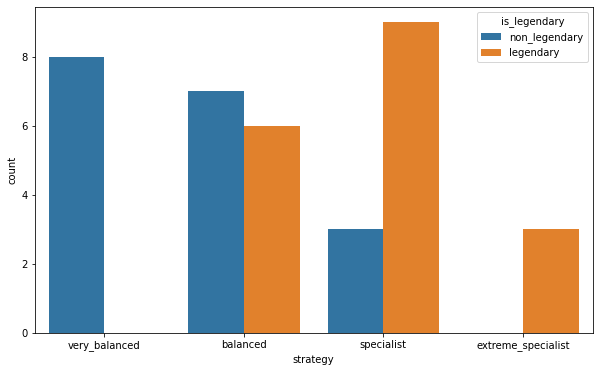

In [143]:
plt.figure(figsize=(10,6))
sns.countplot(data=strategy_by_type_long, x ='strategy', hue='is_legendary')

<AxesSubplot: xlabel='strategy', ylabel='proportion'>

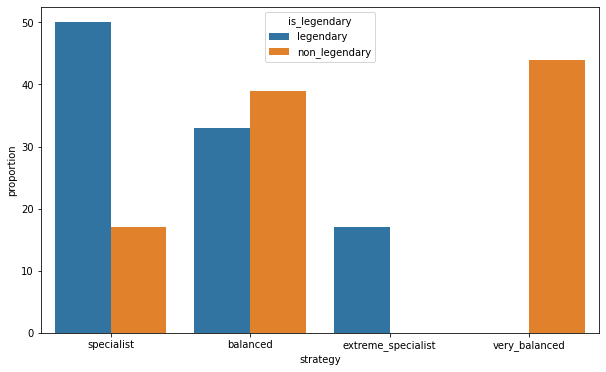

In [144]:
plt.figure(figsize=(10,6))
sns.barplot(data=strategy_by_type_percent, x ='strategy', y='proportion', hue='is_legendary')

In [145]:
leg_by_type_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, bug to water
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attack        18 non-null     float64
 1   defense       18 non-null     float64
 2   hp            18 non-null     float64
 3   sp_attack     18 non-null     float64
 4   sp_defense    18 non-null     float64
 5   speed         18 non-null     float64
 6   max           18 non-null     float64
 7   min           18 non-null     float64
 8   diff          18 non-null     float64
 9   strategy      18 non-null     object 
 10  is_legendary  18 non-null     object 
dtypes: float64(9), object(2)
memory usage: 1.7+ KB


<AxesSubplot: xlabel='strategy', ylabel='count'>

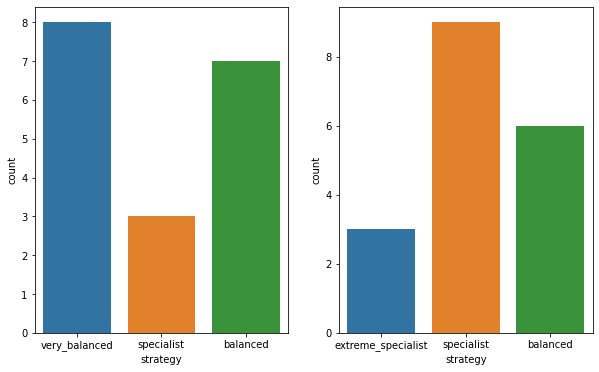

In [146]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=non_leg_by_type_median, x ='strategy')
plt.subplot(1,2,2)
sns.countplot(data=leg_by_type_median, x ='strategy')

In [147]:
list_ordering = ["very_balanced","balanced","specialist", "extreme_specialist"]  

non_leg_by_type_median["strategy"] = non_leg_by_type_median["strategy"].astype("category")
leg_by_type_median["strategy"] = leg_by_type_median["strategy"].astype("category")

In [148]:
non_leg_by_type_median

attack  defense    hp  sp_attack  sp_defense  speed   max   min   
type1                                                                       
bug         32.5     24.0  22.0       22.0        18.0   29.0  32.5  18.0  \
dark        47.0     28.0  25.0       30.0        20.0   38.0  47.0  20.0   
dragon      46.0     33.0  26.0       30.0        24.0   34.0  46.0  24.0   
electric    32.0     24.0  23.0       38.0        24.0   37.0  38.0  23.0   
fairy       25.0     27.0  23.0       30.0        26.0   26.0  30.0  23.0   
fighting    53.0     29.0  27.0       24.0        21.0   34.0  53.0  21.0   
fire        36.0     24.0  25.0       38.0        21.0   37.0  38.0  21.0   
flying      38.0     24.0  25.0       30.0        19.0   43.0  43.0  19.0   
ghost       37.0     31.5  23.0       35.5        27.5   25.5  37.0  23.0   
grass       35.0     29.0  23.5       30.0        24.0   26.0  35.0  23.5   
ground      44.0     33.0  27.0       22.0        19.0   26.0  44.0  19.0   
ice         36.0     30.0  27.0       33.0        22.0   31.0  36.0  22.0   
normal      36.0     24.0  27.0       23.0        19.0   36.5  36.5  19.0   
poison      33.0     25.0  23.0       28.0        21.0   31.0  33.0  21.0   
psychic     28.0     27.0  25.0       38.0        29.0   31.0  38.0  25.0   
rock        44.0     42.0  26.0       24.0        21.0   23.0  44.0  21.0   
steel       46.0     43.0  23.0       24.0        29.0   26.0  46.0  23.0   
water       35.0     28.5  25.0       30.0        21.0   31.0  35.0  21.0   

          diff       strategy   is_legendary  
type1                                         
bug       14.5  very_balanced  non_legendary  
dark      27.0     specialist  non_legendary  
dragon    22.0       balanced  non_legendary  
electric  15.0       balanced  non_legendary  
fairy      7.0  very_balanced  non_legendary  
fighting  32.0     specialist  non_legendary  
fire      17.0       balanced  non_legendary  
flying    24.0       balanced  non_legendary  
ghost     14.0  very_balanced  non_legendary  
grass     11.5  very_balanced  non_legendary  
ground    25.0     specialist  non_legendary  
ice       14.0  very_balanced  non_legendary  
normal    17.5       balanced  non_legendary  
poison    12.0  very_balanced  non_legendary  
psychic   13.0  very_balanced  non_legendary  
rock      23.0       balanced  non_legendary  
steel     23.0       balanced  non_legendary  
water     14.0  very_balanced  non_legendary

<AxesSubplot: xlabel='strategy', ylabel='count'>

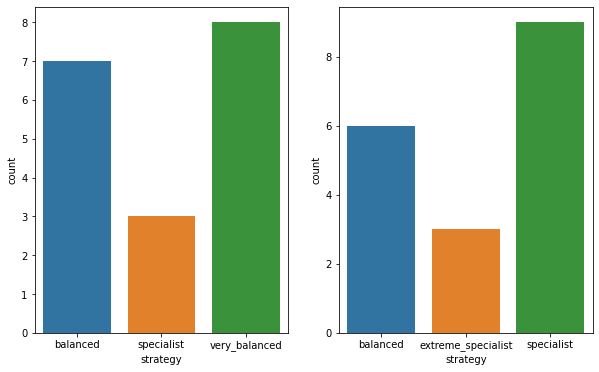

In [149]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=non_leg_by_type_median, x ='strategy')
plt.subplot(1,2,2)
sns.countplot(data=leg_by_type_median, x ='strategy')

<AxesSubplot: xlabel='strategy', ylabel='count'>

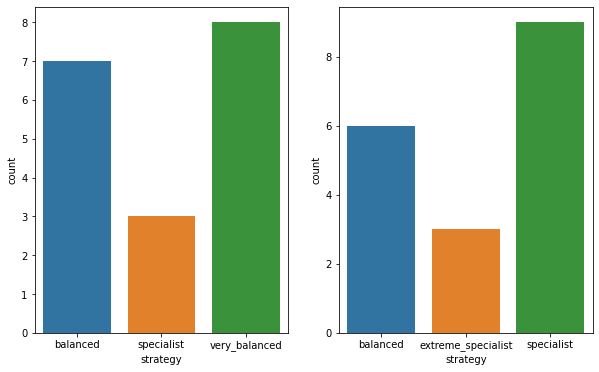

In [150]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=non_leg_by_type_median, x ='strategy')
plt.subplot(1,2,2)
sns.countplot(data=leg_by_type_median, x ='strategy')

In [151]:
import plotly.graph_objects as go
x = non_leg_by_type_median.iloc[:1, :]

fig = go.Figure(data=go.Scatterpolar(
  r=[x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
  theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp'],
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),
  ),
  showlegend=False,
    title = "Non legendary pokemons type bug"
)

fig.show(renderer='iframe_connected')

In [152]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[:1, :]
y = leg_by_type_median.iloc[:1, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "bug non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "bug legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 40]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 80]
    ),

),
)

fig.show(renderer='iframe_connected')
    
  

In [153]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[1:2, :]
y = leg_by_type_median.iloc[1:2, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "dark non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "dark legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')
    

In [154]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[2:3, :]
y = leg_by_type_median.iloc[2:3, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "dragon non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "dragon legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [155]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[3:4, :]
y = leg_by_type_median.iloc[3:4, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "electric non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "electric legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [156]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[4:5, :]
y = leg_by_type_median.iloc[4:5, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "fairy non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "fairy legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [157]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[5:6, :]
y = leg_by_type_median.iloc[5:6, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "fighting non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "fighting legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [158]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[6:7, :]
y = leg_by_type_median.iloc[6:7, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "fire non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "fire legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [159]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[7:8, :]
y = leg_by_type_median.iloc[7:8, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "flying non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "flying legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [160]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[8:9, :]
y = leg_by_type_median.iloc[8:9, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "ghost non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "ghost legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [161]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[9:10, :]
y = leg_by_type_median.iloc[9:10, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "grass non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "grass legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [162]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[10:11, :]
y = leg_by_type_median.iloc[10:11, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "ground non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "ground legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [163]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[11:12, :]
y = leg_by_type_median.iloc[11:12, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "ice non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "ice legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [164]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[12:13, :]
y = leg_by_type_median.iloc[12:13, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "normal non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "normal legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [165]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[13:14, :]
y = leg_by_type_median.iloc[13:14, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "poison non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "poison legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [166]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[14:15, :]
y = leg_by_type_median.iloc[14:15, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "psychic non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "psychic legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [167]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[15:16, :]
y = leg_by_type_median.iloc[15:16, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "rock non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "rock legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [168]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[16:17, :]
y = leg_by_type_median.iloc[16:17, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "steel non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "steel legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

In [169]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = non_leg_by_type_median.iloc[17:, :]
y = leg_by_type_median.iloc[17:, :]
theta=['speed','attack', 'sp_attack','defense', 'sp_defense','hp']

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Scatterpolar(
      name = "water non legendary",
      r = [x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta = theta,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "water legendary",
      r = [y['speed'].values[0],
             y['attack'].values[0],
             y['sp_attack'].values[0],
             y['defense'].values[0],
             y['sp_defense'].values[0],
           y['hp'].values[0],y['speed'].values[0]],
      theta = theta,
     
    ), 1, 2)


fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
     radialaxis=dict(
      visible=True,
        range=[0, 100]),
    ),
    
    polar2 = dict(
      radialaxis=dict(
      visible=True,
        range=[0, 100]
    ),

),
)

fig.show(renderer='iframe_connected')

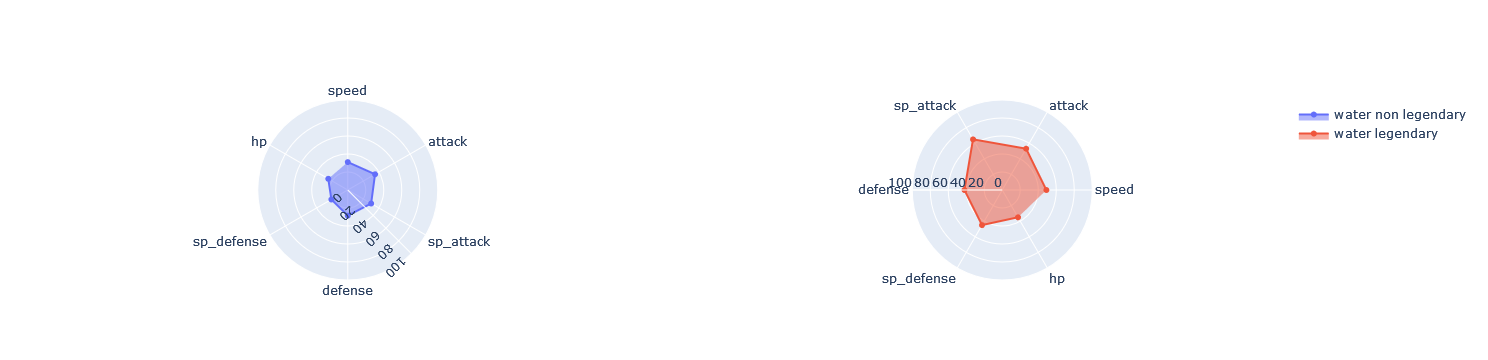

In [170]:
fig.update_layout(
    polar = dict(
      radialaxis_angle = -45,
      angularaxis = dict(
        direction = "clockwise",
        period = 6)
    ),
    polar2 = dict(
      radialaxis = dict(
        angle = 180,
        tickangle = -180 # so that tick labels are not upside down
      )
    ),
    polar3 = dict(
      sector = [80, 400],
      radialaxis_angle = -45,
      angularaxis_categoryarray = ["d", "a", "c", "b"]
    ),
    polar4 = dict(
      radialaxis_categoryorder = "category descending",
      angularaxis = dict(
        thetaunit = "radians",
        dtick = 0.3141592653589793
      ))
)

In [171]:
x

attack  defense    hp  sp_attack  sp_defense  speed   max   min  diff   
type1                                                                          
water    35.0     28.5  25.0       30.0        21.0   31.0  35.0  21.0  14.0  \

            strategy   is_legendary  
type1                                
water  very_balanced  non_legendary

In [172]:
import plotly.graph_objects as go

categories = ['speed','attack', 'sp_attack','defense', 'sp_defense','hp', 'speed']

fig = go.Figure()
x = non_leg_by_type_median 

fig.add_trace(go.Scatterpolar(
      r=[x['speed'].values[0],
             x['attack'].values[0],
             x['sp_attack'].values[0],
             x['defense'].values[0],
             x['sp_defense'].values[0],
           x['hp'].values[0],x['speed'].values[0]],
      theta=categories,
      fill='toself',
      name= x.index[0]
))



fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 100]
    )),
  showlegend=True,
    title = "Non legendary pokemons type bug"
)

fig.show(renderer='iframe_connected')

In [173]:
# paleta kolorów da poszczególnych typów:

type_colors={'normal': '#a8a878', 'fire' : '#f08030', 'water' : '#6890f0', 'grass' : '#78c850',
            'electric' : '#f8d030', 'ice' : '#98d8d8', 'fighting' : '#c03028', 'poison' : '#a040a0',
            'ground' : '#e0c068', 'flying' : '#a890f0' , 'psychic' : '#f85888' , 'bug' : '#a8b820',
            'rock' : '#b8a038' , 'ghost' : '#705898', 'dragon' : '#7038f8' , 'dark' : '#705848',
            'steel' : '#b8b8d0', 'fairy' : '#ee99ac'}              


In [174]:
# sortowanie ramek wraz ze spadającą medianą
grouped_capture_rate = df2_type.loc[:,['type1', 'capture_rate']].groupby(['type1']).median().sort_values(by='capture_rate')

Text(0.5, 1.0, 'Wartości Capture rate dla poszczególnych typów')

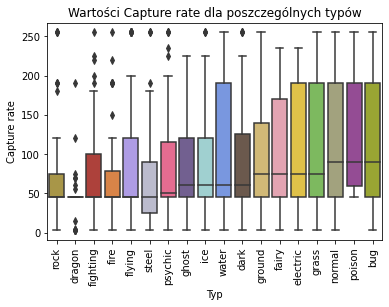

In [175]:
# przykład wykresu z paletą dla typów
fig, ax = plt.subplots()
sns.boxplot(data = df2_type, x= 'type1', y="capture_rate", palette = type_colors, showmeans=False, order=grouped_capture_rate.index)
plt.xticks(rotation = 90)
ax.set_ylabel('Capture rate')
ax.set_xlabel('Typ')
ax.set_title('Wartości Capture rate dla poszczególnych typów')

In [176]:
non_legendary_type = df2_type[df2_type["is_legendary"] ==0]
legendary_type = df2_type[df2_type["is_legendary"] ==1]

### ALL by Type

In [177]:
df2_type

name                    abilities attack base_total  capture_rate   
0     Bulbasaur  ['Overgrow', 'Chlorophyll']     49        318            45  \
1     Bulbasaur  ['Overgrow', 'Chlorophyll']     49        318            45   
2       Ivysaur  ['Overgrow', 'Chlorophyll']     62        405            45   
3       Ivysaur  ['Overgrow', 'Chlorophyll']     62        405            45   
4      Venusaur  ['Overgrow', 'Chlorophyll']    100        625            45   
...         ...                          ...    ...        ...           ...   
1596   Guzzlord              ['Beast Boost']    101        570            15   
1597   Guzzlord              ['Beast Boost']    101        570            15   
1599   Necrozma              ['Prism Armor']    107        600             3   
1600   Magearna               ['Soul-Heart']     95        600             3   
1601   Magearna               ['Soul-Heart']     95        600             3   

     defense experience_growth height_m   hp sp_attack sp_defense speed   
0         49           1059860      0.7   45        65         65    45  \
1         49           1059860      0.7   45        65         65    45   
2         63           1059860      1.0   60        80         80    60   
3         63           1059860      1.0   60        80         80    60   
4        123           1059860      2.0   80       122        120    80   
...      ...               ...      ...  ...       ...        ...   ...   
1596      53           1250000      5.5  223        97         53    43   
1597      53           1250000      5.5  223        97         53    43   
1599     101           1250000      2.4   97       127         89    79   
1600     115           1250000      1.0   80       130        115    65   
1601     115           1250000      1.0   80       130        115    65   

        type1 weight_kg generation is_legendary  tot_abilities  
0      poison       6.9          1            0              2  
1       grass       6.9          1            0              2  
2      poison      13.0          1            0              2  
3       grass      13.0          1            0              2  
4      poison     100.0          1            0              2  
...       ...       ...        ...          ...            ...  
1596   dragon     888.0          7            1              1  
1597     dark     888.0          7            1              1  
1599  psychic     230.0          7            1              1  
1600    fairy      80.5          7            1              1  
1601    steel      80.5          7            1              1  

[1211 rows x 17 columns]

C:\Users\TwigaX\AppData\Local\Temp\ipykernel_27600\837855376.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



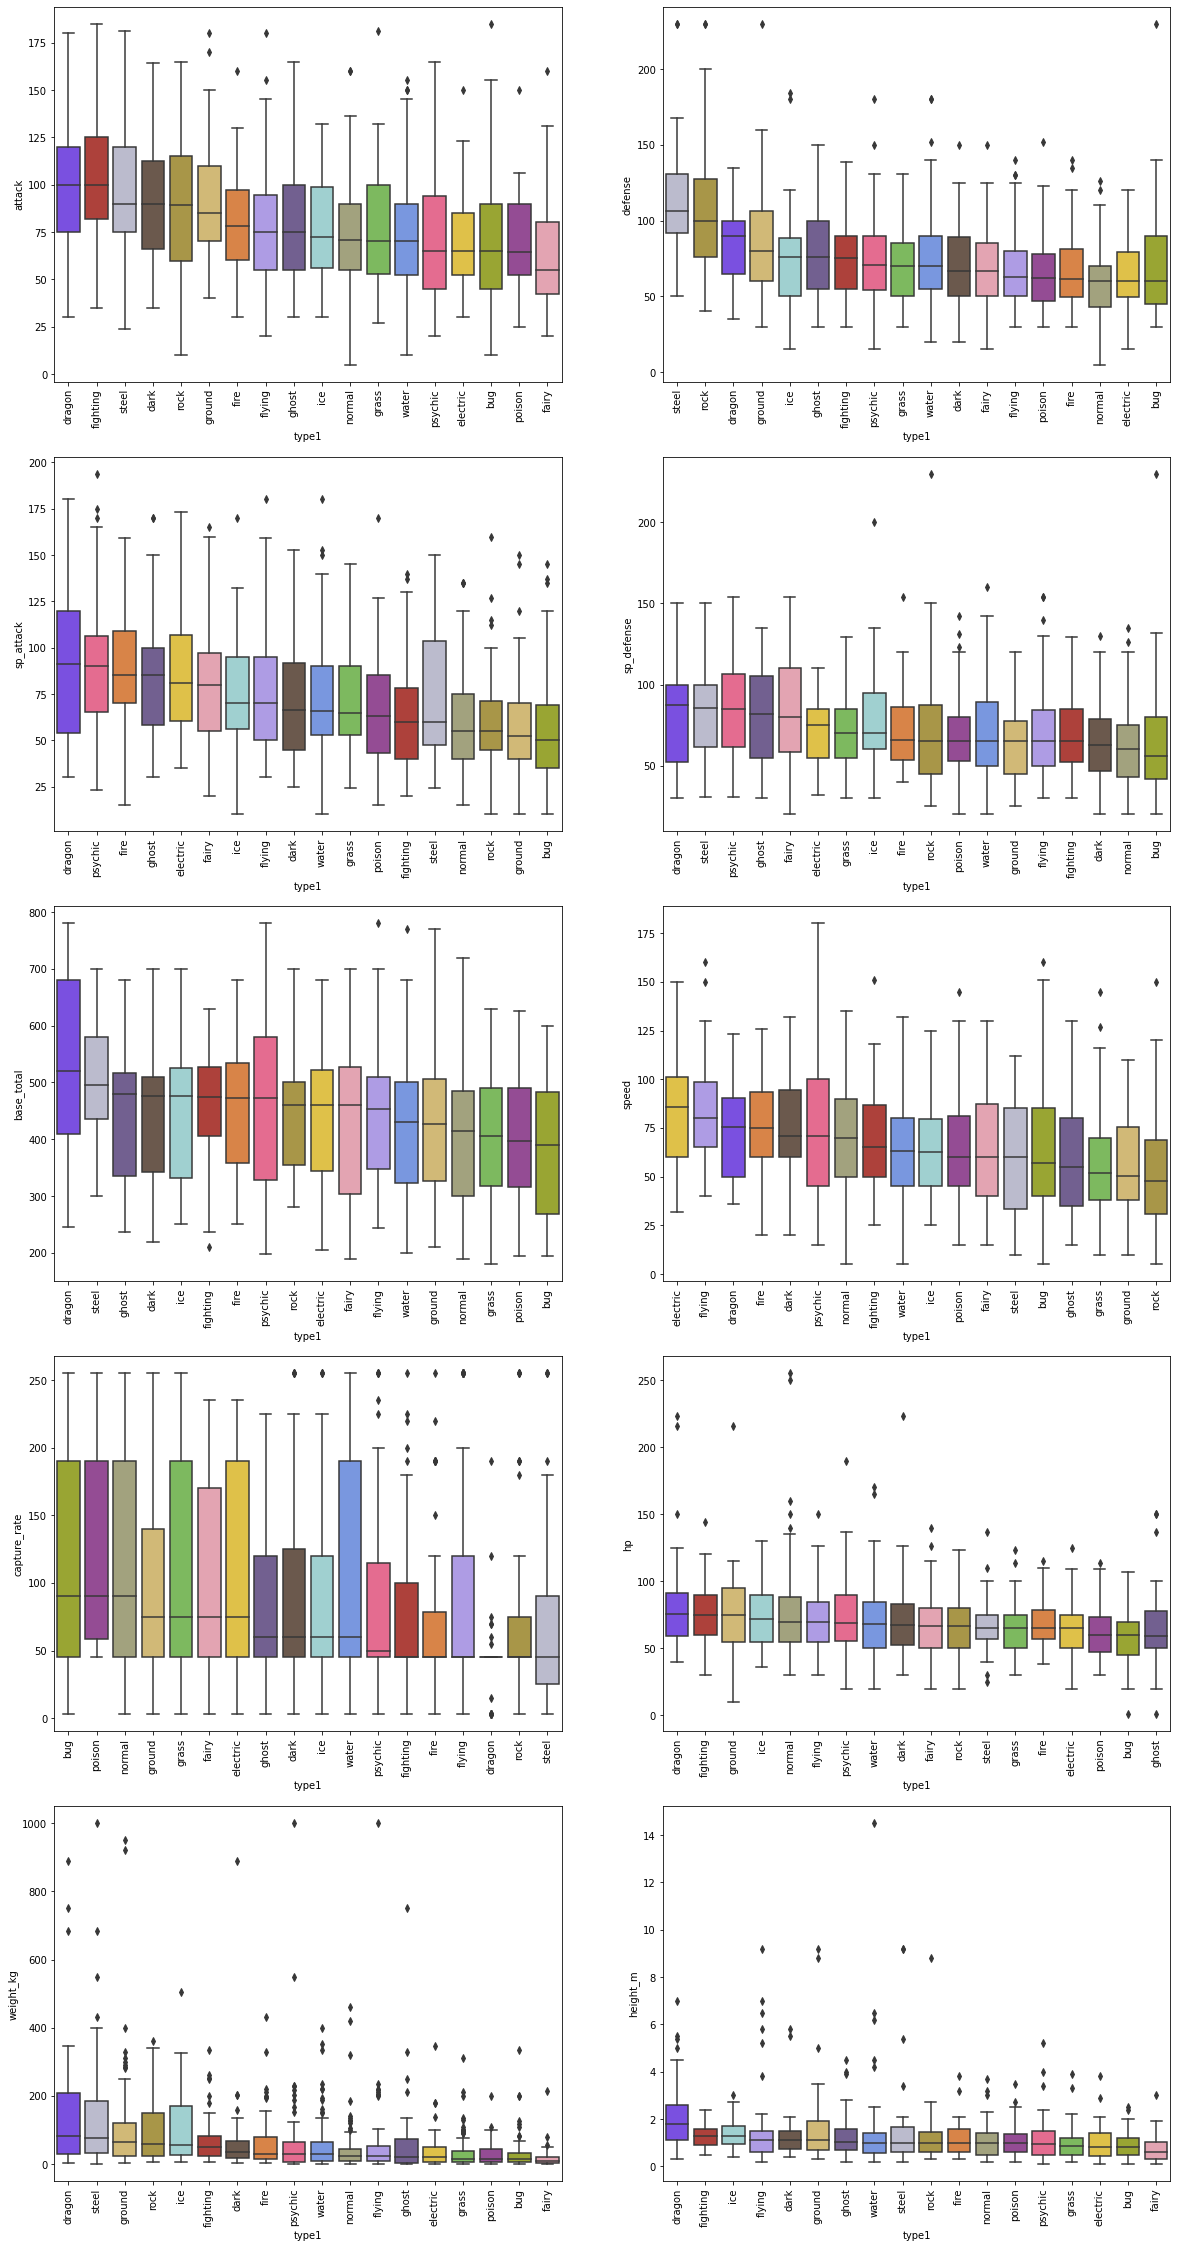

In [178]:

columns = ["attack", "defense", "sp_attack", "sp_defense", 'base_total','speed', 'capture_rate','hp', 'weight_kg','height_m']
fig, ax = plt.subplots(figsize=(20,40))

for i in range(10):
    df =df2_type.loc[:,['type1', columns[i]]]
    order = df.groupby(['type1']).median().sort_values(by=columns[i], ascending= False)
    plt.subplot(5,2,i+1)
    sns.boxplot(data = df, x= 'type1', y=columns[i], palette = type_colors, showmeans=False, order=order.index)
    plt.xticks(rotation = 90)
    ax.set_ylabel(columns[i])
    ax.set_xlabel('Typ')
 
plt.show()

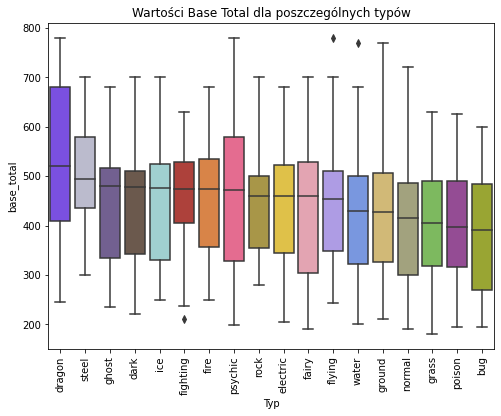

In [179]:
fig, ax = plt.subplots(figsize=(8,6))
df =df2_type.loc[:,['type1', 'base_total']]
order = df.groupby(['type1']).median().sort_values(by='base_total', ascending= False)
sns.boxplot(data = df2_type, x= 'type1', y='base_total', palette = type_colors, showmeans=False, order=order.index)
plt.xticks(rotation = 90)
ax.set_ylabel('base_total')
ax.set_xlabel('Typ')
ax.set_title('Wartości Base Total dla poszczególnych typów')

plt.show()

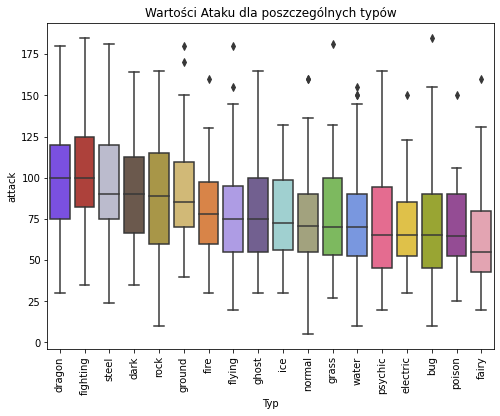

In [180]:
fig, ax = plt.subplots(figsize=(8,6))
df =df2_type.loc[:,['type1', 'attack']]
order = df.groupby(['type1']).median().sort_values(by='attack', ascending= False)
sns.boxplot(data = df2_type, x= 'type1', y='attack', palette = type_colors, showmeans=False, order=order.index)
plt.xticks(rotation = 90)
ax.set_ylabel('attack')
ax.set_xlabel('Typ')
ax.set_title('Wartości Ataku dla poszczególnych typów')

plt.show()

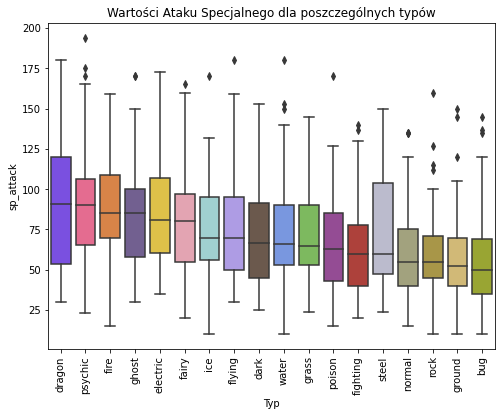

In [181]:
fig, ax = plt.subplots(figsize=(8,6))
df =df2_type.loc[:,['type1', 'sp_attack']]
order = df.groupby(['type1']).median().sort_values(by='sp_attack', ascending= False)
sns.boxplot(data = df2_type, x= 'type1', y='sp_attack', palette = type_colors, showmeans=False, order=order.index)
plt.xticks(rotation = 90)
ax.set_ylabel('sp_attack')
ax.set_xlabel('Typ')
ax.set_title('Wartości Ataku Specjalnego dla poszczególnych typów')

plt.show()

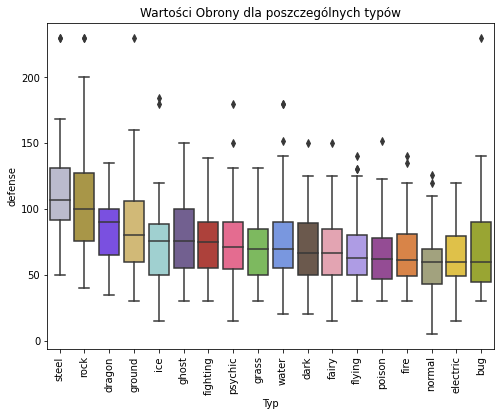

In [182]:
fig, ax = plt.subplots(figsize=(8,6))
df =df2_type.loc[:,['type1', 'defense']]
order = df.groupby(['type1']).median().sort_values(by='defense', ascending= False)
sns.boxplot(data = df2_type, x= 'type1', y='defense', palette = type_colors, showmeans=False, order=order.index)
plt.xticks(rotation = 90)
ax.set_ylabel('defense')
ax.set_xlabel('Typ')
ax.set_title('Wartości Obrony dla poszczególnych typów')

plt.show()

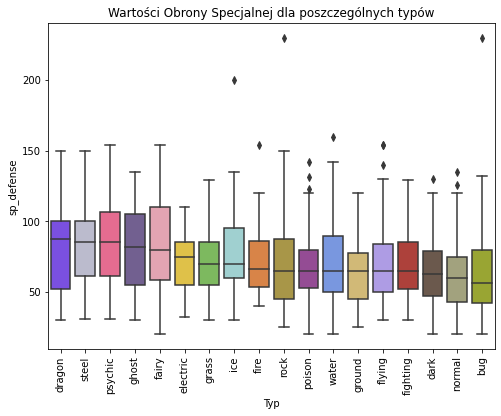

In [183]:
fig, ax = plt.subplots(figsize=(8,6))
df =df2_type.loc[:,['type1', 'sp_defense']]
order = df.groupby(['type1']).median().sort_values(by='sp_defense', ascending= False)
sns.boxplot(data = df2_type, x= 'type1', y='sp_defense', palette = type_colors, showmeans=False, order=order.index)
plt.xticks(rotation = 90)
ax.set_ylabel('sp_defense')
ax.set_xlabel('Typ')
ax.set_title('Wartości Obrony Specjalnej dla poszczególnych typów')

plt.show()

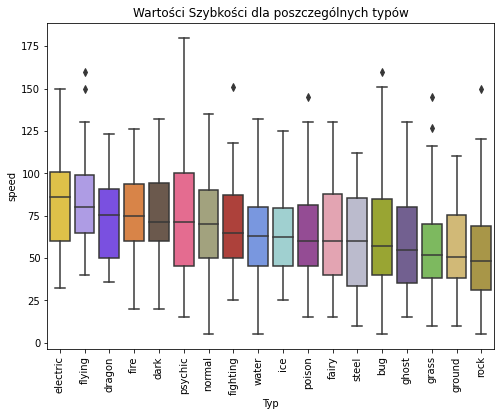

In [184]:
fig, ax = plt.subplots(figsize=(8,6))
df =df2_type.loc[:,['type1', 'speed']]
order = df.groupby(['type1']).median().sort_values(by='speed', ascending= False)
sns.boxplot(data = df2_type, x= 'type1', y='speed', palette = type_colors, showmeans=False, order=order.index)
plt.xticks(rotation = 90)
ax.set_ylabel('speed')
ax.set_xlabel('Typ')
ax.set_title('Wartości Szybkości dla poszczególnych typów')

plt.show()

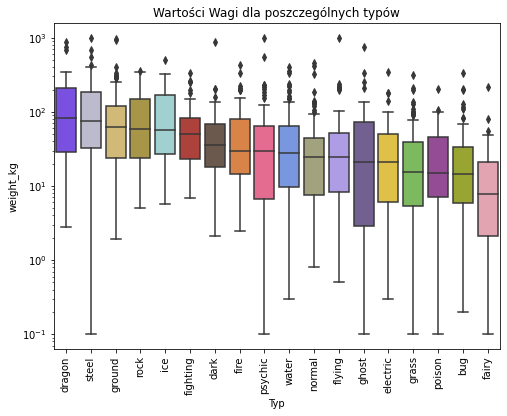

In [185]:
fig, ax = plt.subplots(figsize=(8,6))
df =df2_type.loc[:,['type1', 'weight_kg']]
order = df.groupby(['type1']).median().sort_values(by='weight_kg', ascending= False)
sns.boxplot(data = df2_type, x= 'type1', y='weight_kg', palette = type_colors, showmeans=False, order=order.index)
plt.xticks(rotation = 90)
ax.set_ylabel('weight_kg')
ax.set_xlabel('Typ')
ax.set_title('Wartości Wagi dla poszczególnych typów')
plt.yscale('log')
plt.show()

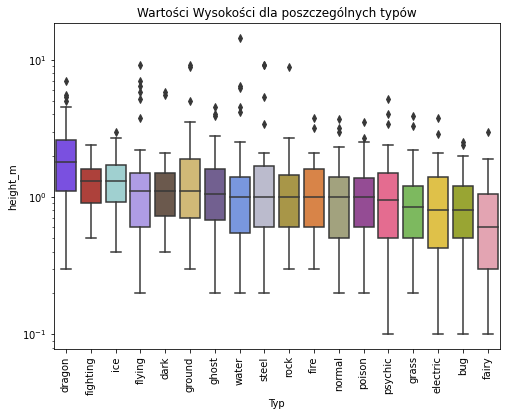

In [186]:
fig, ax = plt.subplots(figsize=(8,6))
df =df2_type.loc[:,['type1', 'height_m']]
order = df.groupby(['type1']).median().sort_values(by='height_m', ascending= False)
sns.boxplot(data = df2_type, x= 'type1', y='height_m', palette = type_colors, showmeans=False, order=order.index)
plt.xticks(rotation = 90)
ax.set_ylabel('height_m')
ax.set_xlabel('Typ')
ax.set_title('Wartości Wysokości dla poszczególnych typów')
plt.yscale('log')
plt.show()

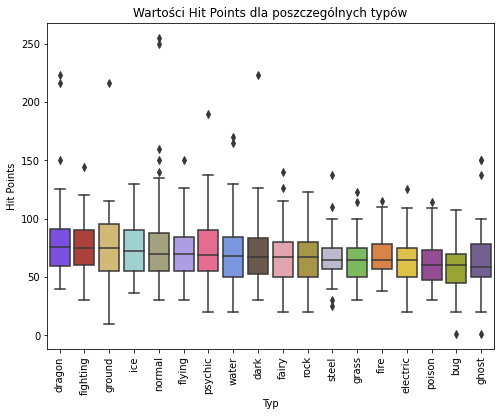

In [198]:
fig, ax = plt.subplots(figsize=(8,6))
df =df2_type.loc[:,['type1', 'hp']]
order = df.groupby(['type1']).median().sort_values(by='hp', ascending= False)
sns.boxplot(data = df2_type, x= 'type1', y='hp', palette = type_colors, showmeans=False, order=order.index)
plt.xticks(rotation = 90)
ax.set_ylabel('Hit Points')
ax.set_xlabel('Typ')
ax.set_title('Wartości Hit Points dla poszczególnych typów')
#plt.yscale('log')
plt.show()

### Boxplots for NON LEGENDARY by type

In [187]:
# sortowanie ramek wraz ze spadającą medianą
grouped_attack = non_legendary_type.loc[:,['type1', 'attack']].groupby(['type1']).median().sort_values(by='attack', ascending= False)

Text(0.5, 1.0, 'Wartości Ataku dla poszczególnych typów')

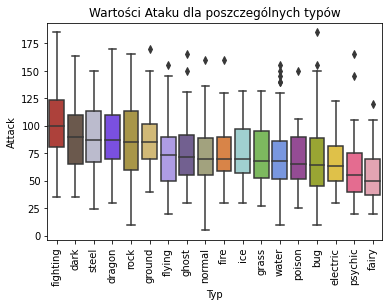

In [188]:
fig, ax = plt.subplots()
sns.boxplot(data = non_legendary_type, x= 'type1', y="attack", palette = type_colors, showmeans=False, order=grouped_attack.index)
plt.xticks(rotation = 90)
ax.set_ylabel('Attack')
ax.set_xlabel('Typ')
ax.set_title('Wartości Ataku dla poszczególnych typów')

In [189]:
# sortowanie ramek wraz ze spadającą medianą
grouped_attack = non_legendary_type.loc[:,['type1', 'attack']].groupby(['type1']).median().sort_values(by='attack', ascending= False)

In [190]:
non_legendary_type.set_index('type1')

name                                  abilities attack   
type1                                                                   
poison    Bulbasaur                ['Overgrow', 'Chlorophyll']     49  \
grass     Bulbasaur                ['Overgrow', 'Chlorophyll']     49   
poison      Ivysaur                ['Overgrow', 'Chlorophyll']     62   
grass       Ivysaur                ['Overgrow', 'Chlorophyll']     62   
poison     Venusaur                ['Overgrow', 'Chlorophyll']    100   
...             ...                                        ...    ...   
dragon     Jangmo-o  ['Bulletproof', 'Soundproof', 'Overcoat']     55   
fighting   Hakamo-o  ['Bulletproof', 'Soundproof', 'Overcoat']     75   
dragon     Hakamo-o  ['Bulletproof', 'Soundproof', 'Overcoat']     75   
fighting    Kommo-o  ['Bulletproof', 'Soundproof', 'Overcoat']    110   
dragon      Kommo-o  ['Bulletproof', 'Soundproof', 'Overcoat']    110   

         base_total  capture_rate defense experience_growth height_m  hp   
type1                                                                      
poison          318            45      49           1059860      0.7  45  \
grass           318            45      49           1059860      0.7  45   
poison          405            45      63           1059860      1.0  60   
grass           405            45      63           1059860      1.0  60   
poison          625            45     123           1059860      2.0  80   
...             ...           ...     ...               ...      ...  ..   
dragon          300            45      65           1250000      0.6  45   
fighting        420            45      90           1250000      1.2  55   
dragon          420            45      90           1250000      1.2  55   
fighting        600            45     125           1250000      1.6  75   
dragon          600            45     125           1250000      1.6  75   

         sp_attack sp_defense speed weight_kg generation is_legendary   
type1                                                                   
poison          65         65    45       6.9          1            0  \
grass           65         65    45       6.9          1            0   
poison          80         80    60      13.0          1            0   
grass           80         80    60      13.0          1            0   
poison         122        120    80     100.0          1            0   
...            ...        ...   ...       ...        ...          ...   
dragon          45         45    45      29.7          7            0   
fighting        65         70    65      47.0          7            0   
dragon          65         70    65      47.0          7            0   
fighting       100        105    85      78.2          7            0   
dragon         100        105    85      78.2          7            0   

          tot_abilities  
type1                    
poison                2  
grass                 2  
poison                2  
grass                 2  
poison                2  
...                 ...  
dragon                3  
fighting              3  
dragon                3  
fighting              3  
dragon                3  

[1097 rows x 16 columns]

In [191]:
columns = ["attack", "defense", "sp_attack", "sp_defense", 'base_total','speed', 'capture_rate','hp', 'weight_kg','height_m']

In [192]:
grouped_attack = non_legendary_type.loc[:,['type1', columns[1]]].groupby(['type1']).median().sort_values(by=columns[1], ascending= False)
grouped_attack

defense
type1           
steel      102.5
rock       100.0
dragon      80.0
ground      80.0
ghost       75.5
ice         72.0
fighting    71.0
grass       70.0
water       69.5
dark        67.0
psychic     65.0
fairy       65.0
poison      62.0
flying      60.0
fire        60.0
normal      60.0
bug         60.0
electric    58.0

C:\Users\TwigaX\AppData\Local\Temp\ipykernel_27600\2716695523.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



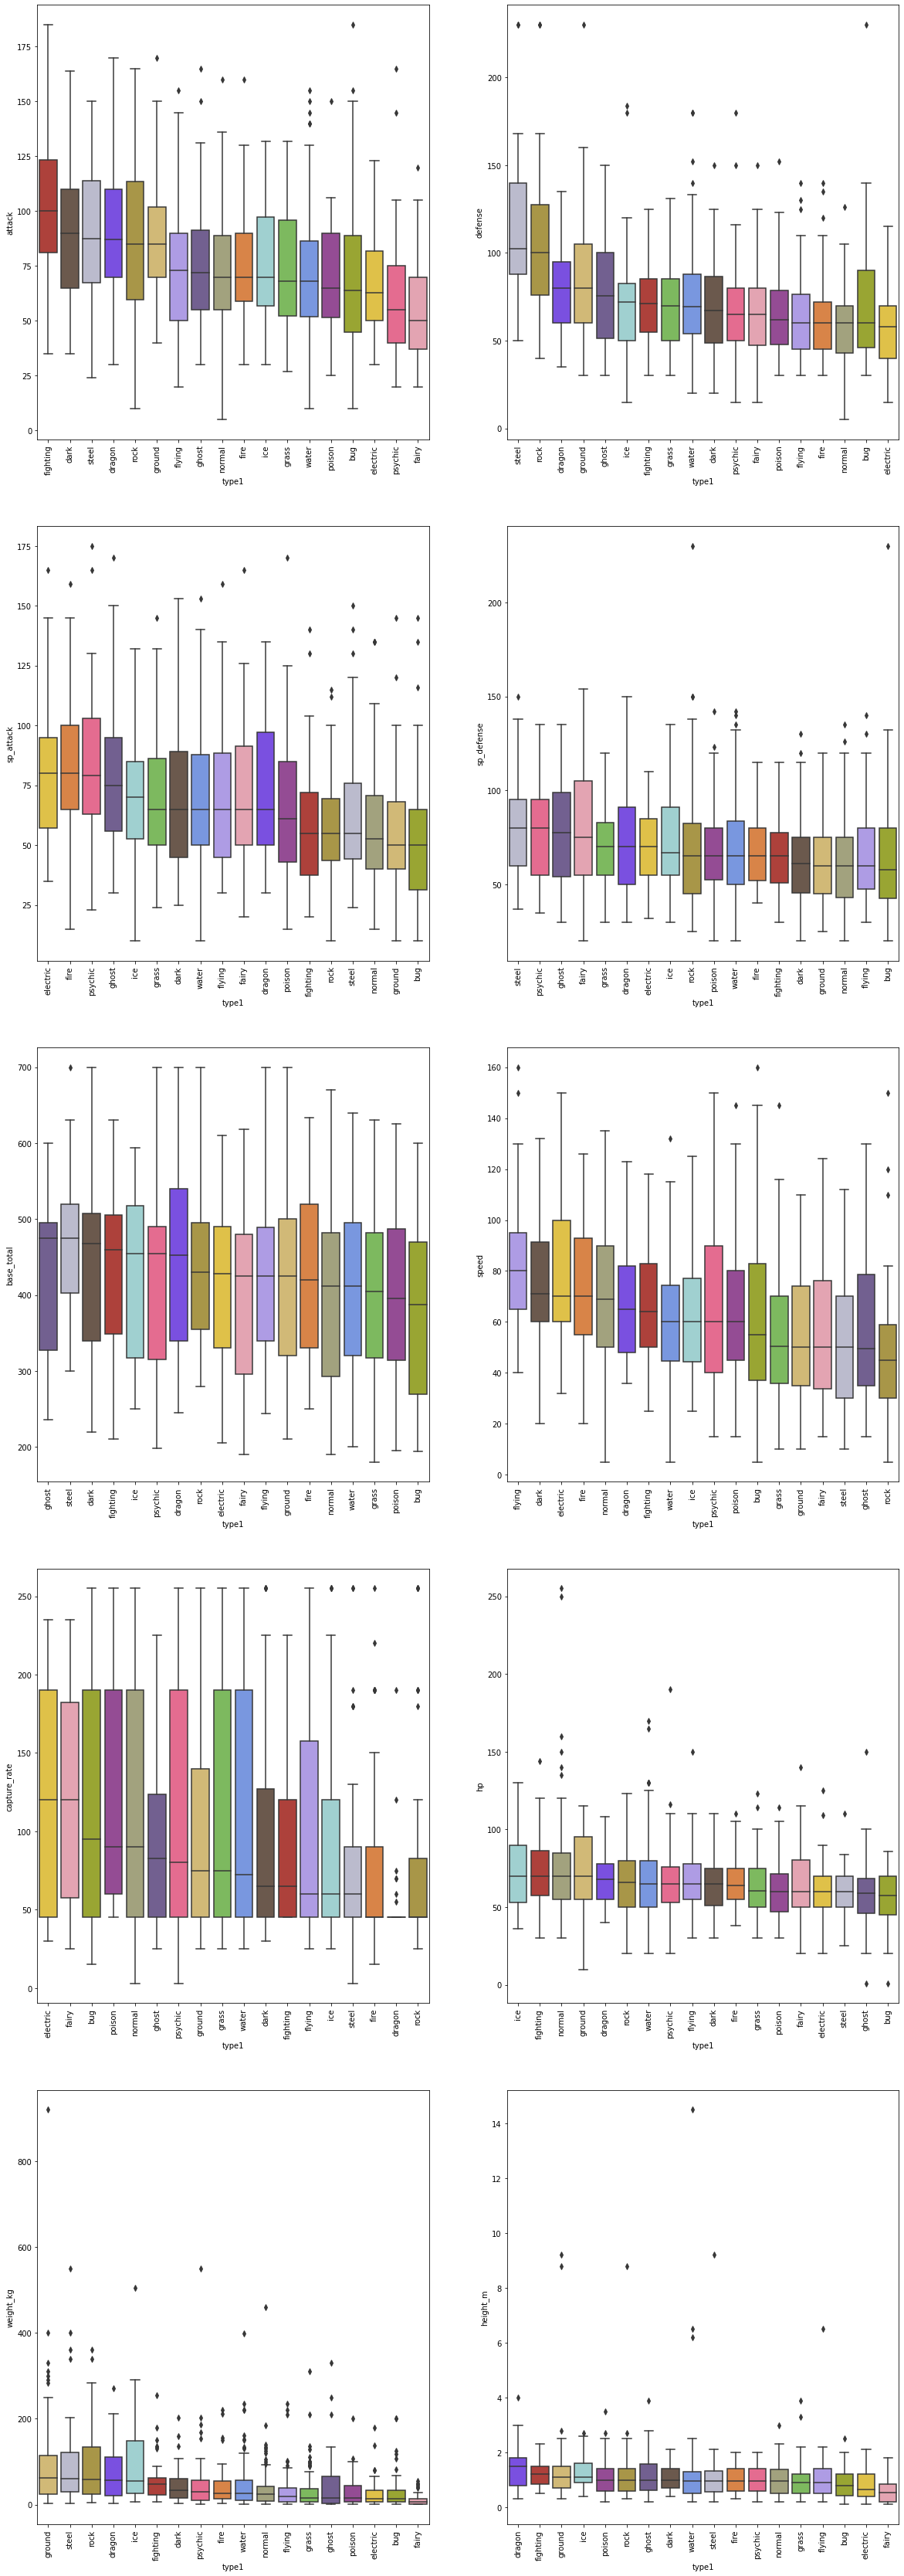

In [193]:

columns = ["attack", "defense", "sp_attack", "sp_defense", 'base_total','speed', 'capture_rate','hp', 'weight_kg','height_m']
fig, ax = plt.subplots(figsize=(20,60))

for i in range(10):
    df =non_legendary_type.loc[:,['type1', columns[i]]]
    order = df.groupby(['type1']).median().sort_values(by=columns[i], ascending= False)
    plt.subplot(5,2,i+1)
    sns.boxplot(data = df, x= 'type1', y=columns[i], palette = type_colors, showmeans=False, order=order.index)
    plt.xticks(rotation = 90)
    ax.set_ylabel(columns[i])
    ax.set_xlabel('Typ')
plt.show()

C:\Users\TwigaX\AppData\Local\Temp\ipykernel_27600\636895433.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



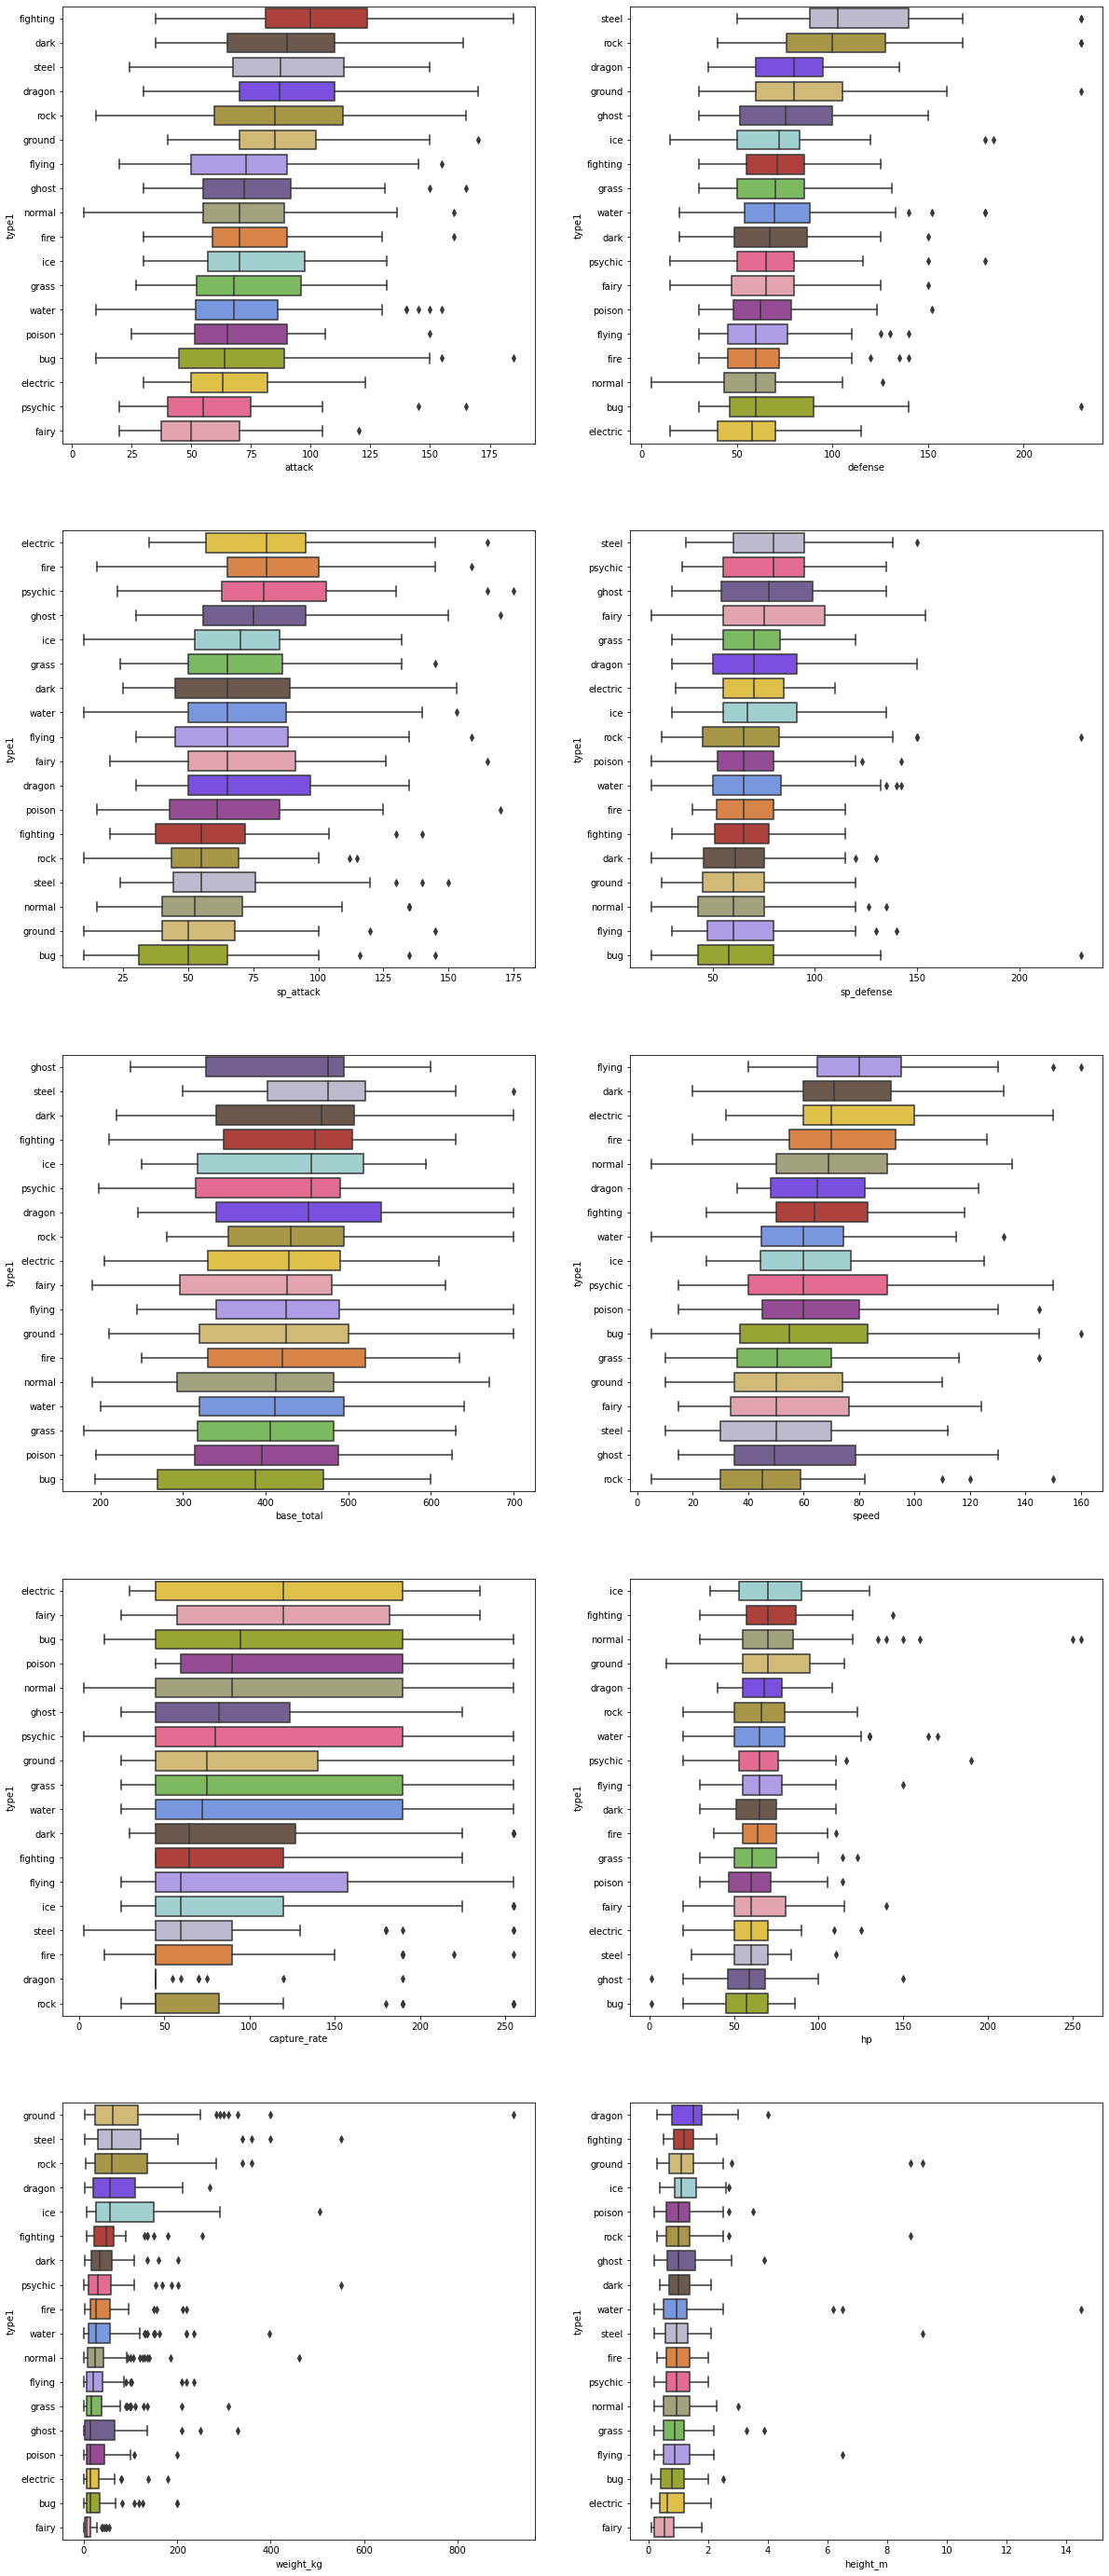

In [194]:

columns = ["attack", "defense", "sp_attack", "sp_defense", 'base_total','speed', 'capture_rate','hp', 'weight_kg','height_m']
fig, ax = plt.subplots(figsize=(20,50))

for i in range(10):
    df =non_legendary_type.loc[:,['type1', columns[i]]]
    order = df.groupby(['type1']).median().sort_values(by=columns[i], ascending= False)
    plt.subplot(5,2,i+1)
    sns.boxplot(data = df, x= columns[i], y='type1', palette = type_colors, showmeans=False, order=order.index)
    #plt.xticks(rotation = 90)
    ax.set_ylabel('Typ')
    ax.set_xlabel(columns[i])
plt.show()

C:\Users\TwigaX\AppData\Local\Temp\ipykernel_27600\4232543855.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



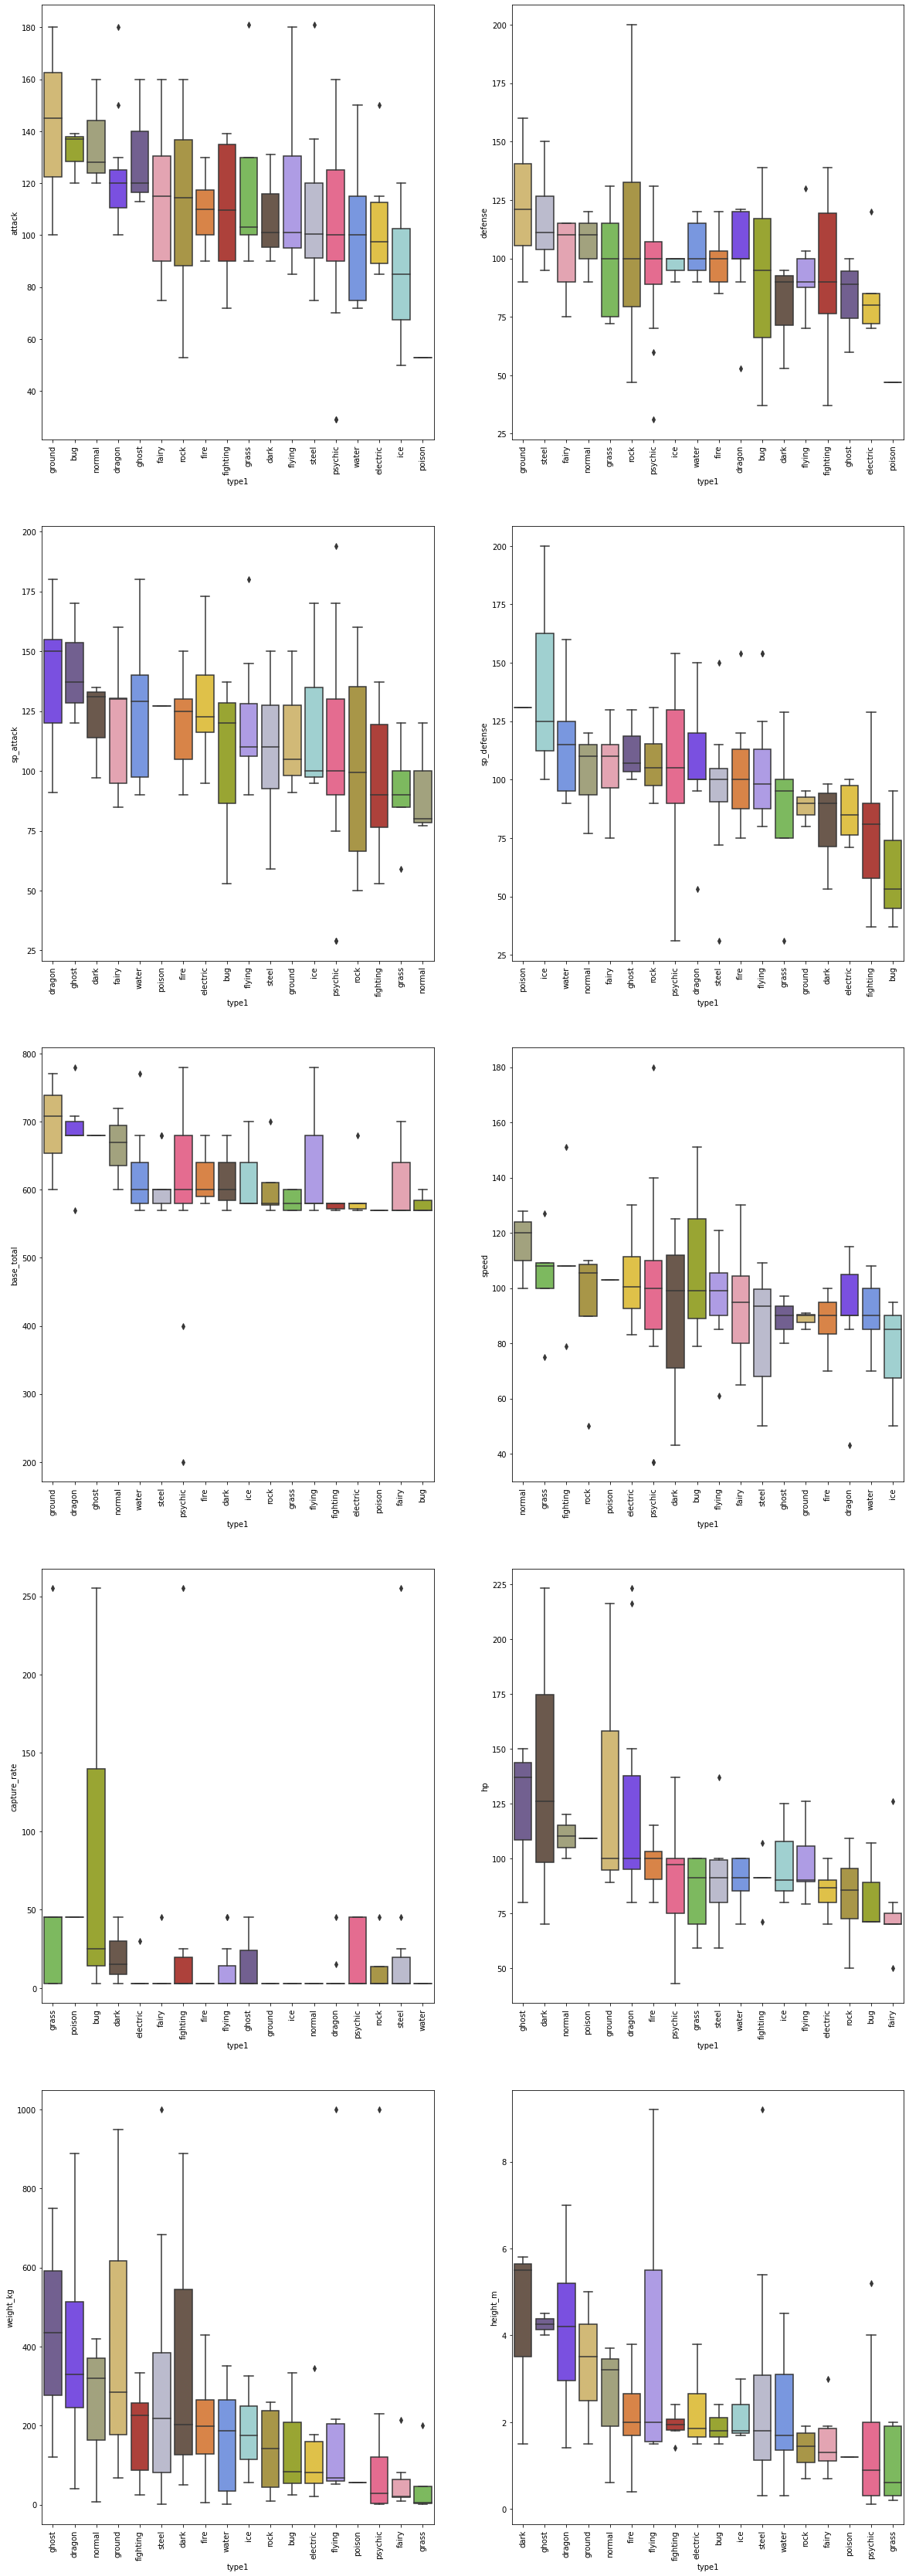

In [195]:

columns = ["attack", "defense", "sp_attack", "sp_defense", 'base_total','speed', 'capture_rate','hp', 'weight_kg','height_m']
fig, ax = plt.subplots(figsize=(20,60))

for i in range(10):
    df =legendary_type.loc[:,['type1', columns[i]]]
    order = df.groupby(['type1']).median().sort_values(by=columns[i], ascending= False)
    plt.subplot(5,2,i+1)
    sns.boxplot(data = df, x= 'type1', y=columns[i], palette = type_colors, showmeans=False, order=order.index)
    plt.xticks(rotation = 90)
    ax.set_ylabel(columns[i])
    ax.set_xlabel('Typ')
plt.show()

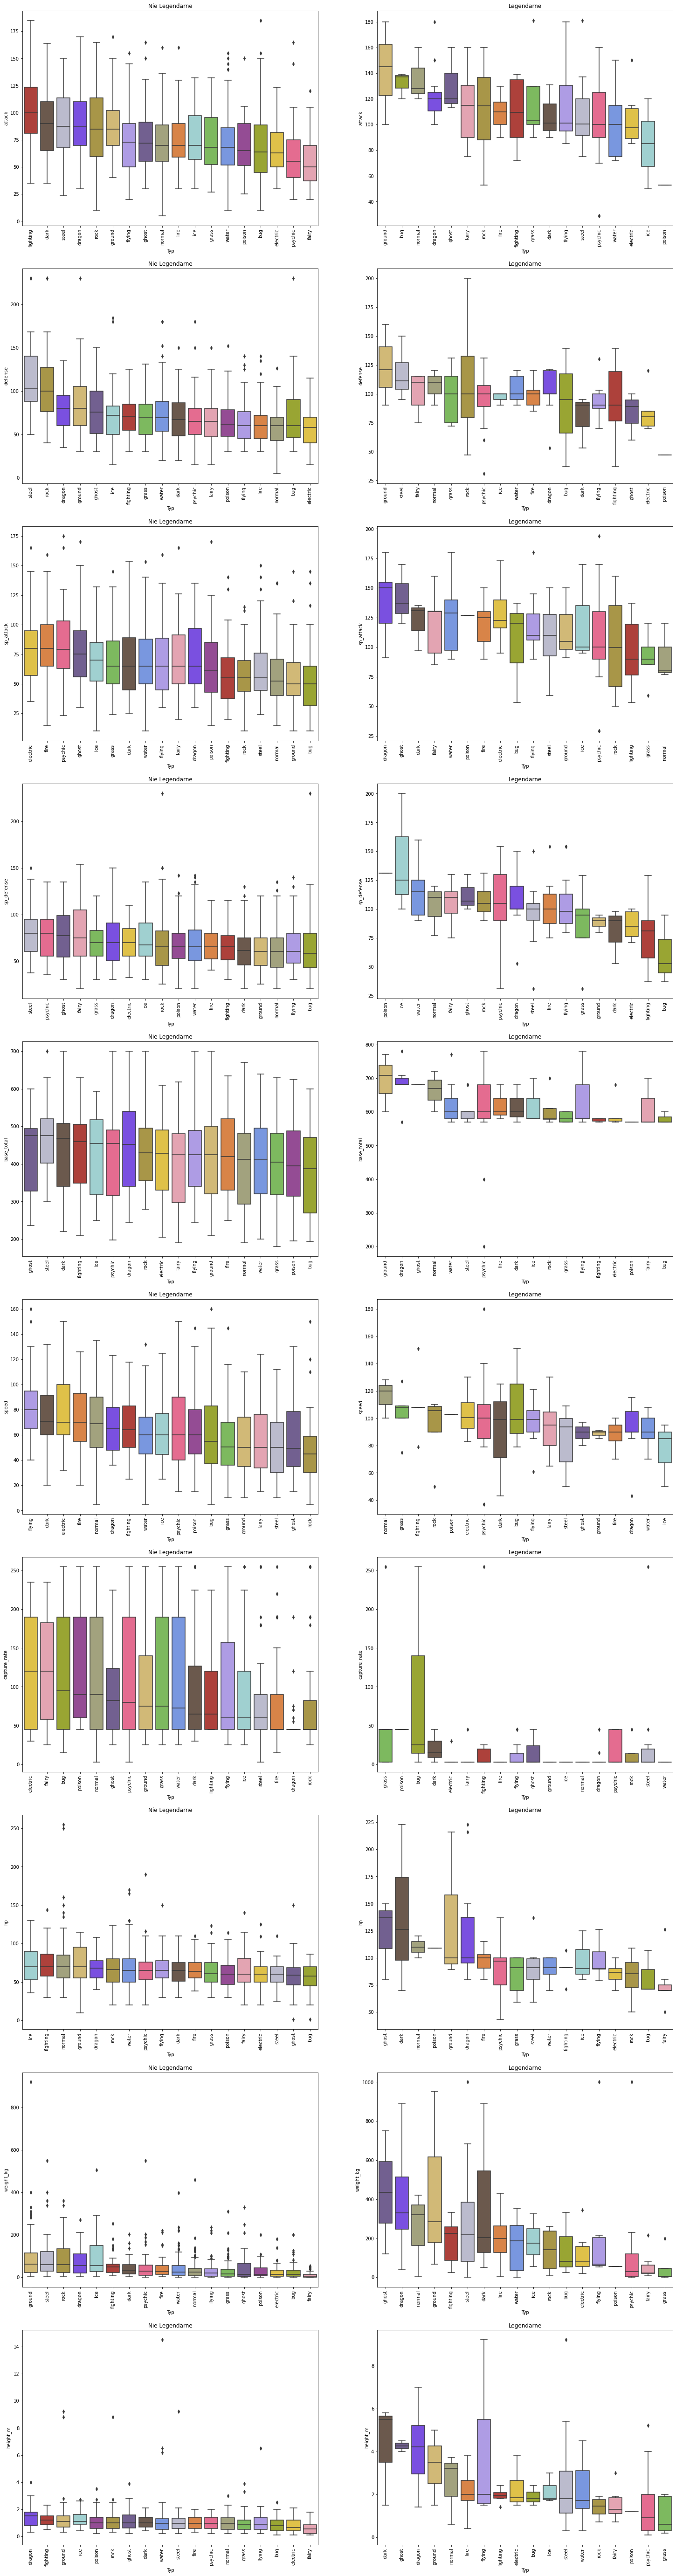

In [196]:

columns = ["attack", "defense", "sp_attack", "sp_defense", 'base_total','speed', 'capture_rate','hp', 'weight_kg','height_m']
odds =[1,3,5,7,9,11,13,15,17,19]
evens =[2,4,6,8,10,12,14,16,18,20]
plt.figure(figsize=(25,100))

for i in range(10):
    df1 =non_legendary_type.loc[:,['type1', columns[i]]]
    df2 =legendary_type.loc[:,['type1', columns[i]]] 
    order1 = df1.groupby(['type1']).median().sort_values(by=columns[i], ascending= False)
    order2 = df2.groupby(['type1']).median().sort_values(by=columns[i], ascending= False)
    plt.subplot(10,2,odds[i])
    sns.boxplot(data = df1, x= 'type1', y=columns[i], palette = type_colors, showmeans=False, order=order1.index)
    plt.xticks(rotation = 90)
    plt.ylabel(columns[i])
    plt.xlabel('Typ')
    plt.title('Nie Legendarne')
    plt.subplot(10,2,evens[i])
    sns.boxplot(data = df2, x= 'type1', y=columns[i], palette = type_colors, showmeans=False, order=order2.index)
    plt.xticks(rotation = 90)
    plt.ylabel(columns[i])
    plt.xlabel('Typ')
    plt.title('Legendarne')
plt.show()

ValueError: Could not interpret input 'weight_kg'

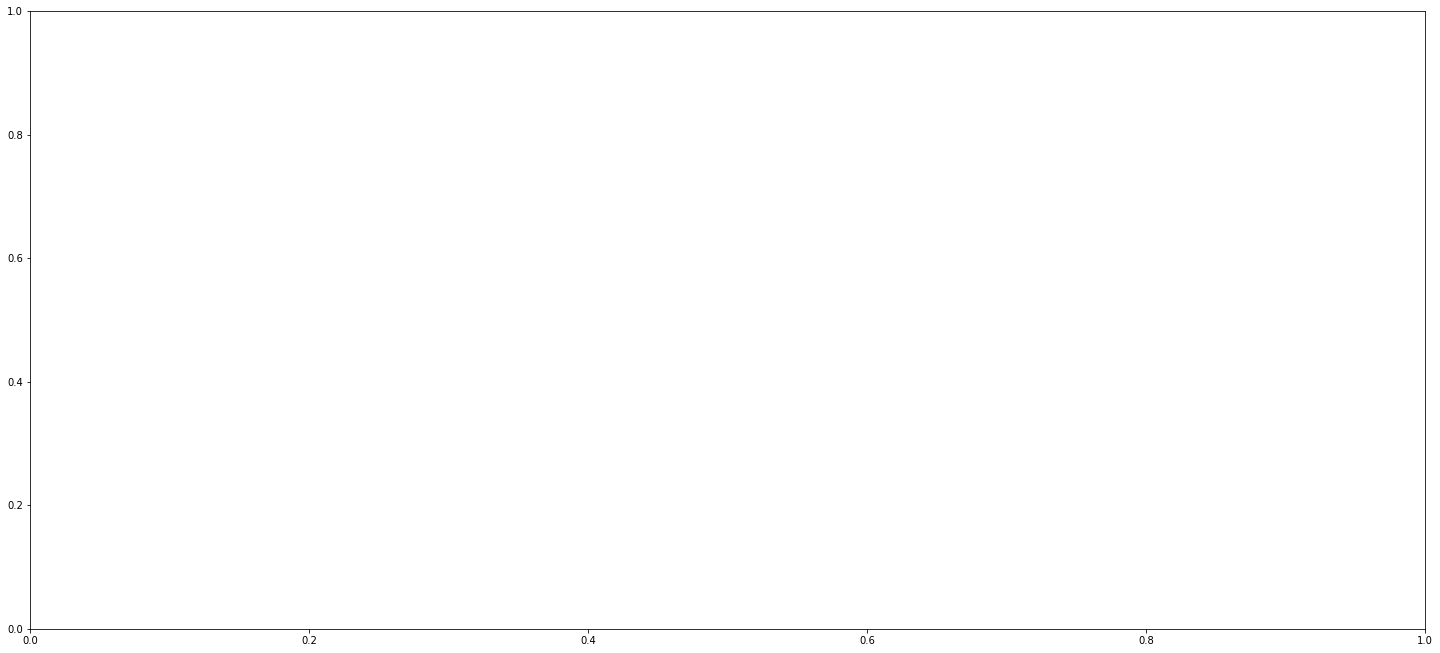

In [197]:
columns = ['weight_kg','height_m']

plt.figure(figsize=(25,25))
for i in range(2):
    plt.subplot(2,1,i+1)
    sns.boxplot(data = df, y=df["type1"].sort_values(), x=columns[i], hue ='is_legendary')
    #plt.xscale('log')
plt.show()


In [ ]:
df2.columns

In [ ]:
df3 = df2.drop(columns= ['abilities', 'experience_growth', 'generation','is_legendary', 'tot_abilities' ], axis=1)
df3